# i. Intro

Program ini bertujuan untuk membuat model Regresi linier menggunakan Machine learning framework Scikit-Learn untuk memprediksi harga perjalanan platform ride-hailing. Model ini akan membantu dalam memahami berbagai faktor yang mempengaruhi harga perjalanan platform ride-hailing, transportasi online sejenis seperti Uber dan Lyft, serta dapat mampu memberikan estimasi terkait biaya perjalanan berdasarkan faktor-faktor yang dianalisis dalam model ini.

Dataset yang digunakan adalah Uber and Lyft Dataset Boston, MA, merupakan sampel yang diambil pada tahun 2018 berdasarkan data dari 2 perusahaan penyedia layanan transportasi ride-hailing di Amerika Serikat, yaitu Uber dan Lyft. Data dapat diakses melalui website komunitas data Kaggle dengan link sebagai berikut:   
https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma?datasetId=370703&sortBy=voteCount


# ii. Import Libraries

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


# iii. Data Loading

In [121]:
# Menampilkan sampel data dengan 5 baris data teratas
data = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [122]:
# Mengidentfikasi Jumlah data dan tipe data pada setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [123]:
# Menyesuaikan format pada kolom datetime
data['datetime'] = pd.to_datetime(data['datetime'])

In [124]:
# Mengidentifikasi data berdasarkan nilai unik
data_unique = data.nunique()

print('Jumlah Nilai Unik pada Data:\n ')
print(data_unique)

Jumlah Nilai Unik pada Data:
 
id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust           

In [125]:
# Identifikasi Data pada kolom 'month'
month_value_counts = data['month'].value_counts()
month_percentages = data['month'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

month_counts = pd.DataFrame({'Jumlah Data': month_value_counts, '(%)Presentase': month_percentages})
print(month_counts)

       Jumlah Data (%)Presentase
month                           
12          406614        58.67%
11          286457        41.33%


Pada kolom 'month' atau bulan ini terdapat 2 nilai, yaitu 11 dan 12, yang mengindikasikan bahwa hanya terdapat 2 bulan yang diobservasi, yaitu bulan November dan Desember, dengan mayoritas data adalah pada bulan Desember (58%).

In [126]:
# Identifikasi Data pada kolom 'timezone'
print(data['timezone'].value_counts())

timezone
America/New_York    693071
Name: count, dtype: int64


Pada kolom 'timezone' hanya terdapat 1 nilai, yaitu America/New_York yang menunjukkan bahwa pada dataset ini hanya spesifik merujuk pada 1 zona waktu, yaitu Kota New York, AS.

In [127]:
# Identifikasi Data pada kolom 'cab_type'
cab_type_value_counts = data['cab_type'].value_counts()
cab_type_percentages = data['cab_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

cab_type_counts = pd.DataFrame({'Jumlah Data': cab_type_value_counts, '(%)Presentase': cab_type_percentages})
print(cab_type_counts)

          Jumlah Data (%)Presentase
cab_type                           
Uber           385663        55.65%
Lyft           307408        44.35%


Pada kolom 'cab_type', diketahui Uber mendominasi sekitar 55% dari keseluruhan data, dengan Uber mewakili data untuk perusahaan layanan transportasi online Uber, sedangkan Lyft juga mawakili data untuk perusahaan penyedia layanan transportasi online bernama Lyft.

# iv. Exploratory Data Analysis (EDA)

## Mendeteksi Missing Data

In [128]:
# Mendeteksi Missing Data
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

price    55095
dtype: int64


In [129]:
# Mengecek Presentase Missing Data
missing_percentage = (data['price'].isnull().sum() / len(data)) * 100
print(f"Presentase missing values dalam kolom 'price' adalah: {missing_percentage:.2f}%")

Presentase missing values dalam kolom 'price' adalah: 7.95%


Terdapat sekitar 55 ribu nilai missing data pada kolom 'price' yang perlu dianalisa lebih lanjut dikarenakan objek analisis ini terkait dengan analisis harga pada kolom 'price'. 

In [130]:
# Memfilter missing data
data_missing_price = data[data['price'].isnull()]

In [131]:
# Mengidentifikasi secara spesifik kolom yang memiliki missing data
missing_unique_data = data_missing_price.columns[data_missing_price.nunique() == 1]
print(missing_unique_data)

Index(['timezone', 'cab_type', 'product_id', 'name', 'surge_multiplier'], dtype='object')


In [132]:
# Mengidentifikasi data pada kolom 'name' yang hilang
name_missing_data = data_missing_price.groupby(['cab_type', 'name'])['price'].nunique().reset_index()
print(name_missing_data)

  cab_type  name  price
0     Uber  Taxi      0


Dari hasil identifikasi missing values diatas, diketahui bahwa nilai missing data terasosiasi dengan data Uber Taxi. Dalam konteks analisis ini, maka data untuk Uber kategori Taxi dapat dihapus dengan alasan relevansi. Penggunaan variabel ini sebagai variabel prediktor tidak memungkinkan karena tidak ditemukan data terkait target utamanya pada kolom 'price'. Hal ini juga terkait dengan objektif analisis ini untuk memprediksi harga perjalanan platform ride-hailing, ada kemungkinan untuk layanan Taxi memiliki skema perhitungan harga yang berbeda.

In [133]:
# Menghapus Missing Values
data = data.drop(data[(data['price'].isnull()) & (data['name'] == 'Taxi')].index)

Untuk mengidentifikasi adanya data yang terinput dengan nilai-nilai kosong atau terasosiasi dengan input data kosong sebagai berikut: ('?', '-', 'NA', 'n/a', 'none', ''):

In [134]:
# Mengidentifikasi non-standard missing values
non_standard_na = ['?', '-', 'NA', 'n/a', 'none', '']

# Cek keadaan non-standard missing values
data_missing = data.isin(non_standard_na).any()

# Menampilkan kolom yang terdapat non-standard missing values
print(data_missing[data_missing == True])

Series([], dtype: bool)


Berdasarkan pengecekan diatas, tidak ditemukan data yang terinput dengan nilai-nilai kosong atau terasosiasi dengan input data kososng sebagai berikut: ('?', '-', 'NA', 'n/a', 'none', '')

## Mendeteksi Data Duplikat

In [135]:
# Mendeteksi Data Duplikat
duplicate_rows = data[data.duplicated()]
print(f"Jumlah Data Duplikat: {duplicate_rows.shape[0]}")

Jumlah Data Duplikat: 0


Berdasarkan hasil deteksi, tidak ditemukan adanya data yang terduplikasi.

## Handling Cardinality

In [136]:
# Mengecek Cardinality
for col in data.columns:
    if data[col].dtype == 'object':
        print(col, ":", data[col].nunique())

id : 637976
timezone : 1
source : 12
destination : 12
cab_type : 2
product_id : 12
name : 12
short_summary : 9
long_summary : 11
icon : 7


**Hasil Pengecekkan Cardinality:**   
<ul>
<li>id: Kolom ini memiliki kardinalitas sangat tinggi dengan 693.071 nilai unik. Ini merupakan kode pengidentifikasi unik untuk setiap transkasi perjalanan, sehingga tidak memiliki daya prediksi terkait dengan harga dan perlu dihapus dari data.     
<li>timezone: Kolom ini hanya memiliki 1 nilai unik, artinya tidak bervariasi dan tidak akan memberikan informasi yang relevan untuk model regresi, sehingga kolom ini perlu dihapus dari data.     
<li>source dan destination: Keduanya memiliki 12 nilai unik. Teknik one-hot encoding dapat diaplikasikan.   
<li>cab_type: Hanya terdapat 2 nilai unik, sehingga nantinya bisa menggunakan teknik one-hot-encoding atau binary encoding.     
<li>product_id dan name: Kolom ini perlu dianalisis lebih lanjut untuk mengecek apakah terdapat kesamaan anatara kategori kedua kolom tersebut.     
<li>short_summary, long_summary, dan icon: Kolom ini mewakili kondisi cuaca. Kolom ini juga perlu dianalisis lebih lanjut, untuk memastikan ketiga kolom ini tidak menghasilkan informasi yang identik satu sama lain.
<ul>

In [137]:
# Menghapus data untuk kolom 'id' dan 'timezone'
data = data.drop(['id', 'timezone'], axis=1)

In [138]:
# Mengecek apakah data pada kolom 'source' dan 'destination' identik

# Menampilkan data unik pada masing-masing kolom
unique_source = data['source'].unique()
unique_destination = data['destination'].unique()

# Mengurutkan data
sorted_source = sorted(unique_source)
sorted_destination = sorted(unique_destination)

# Menggabungkan kedua kolom
df_combined = pd.DataFrame({
    'source': sorted_source,
    'destination': sorted_destination
})
# Menampilkan data unik untuk masing-masing kolom
print(df_combined)

                     source              destination
0                  Back Bay                 Back Bay
1               Beacon Hill              Beacon Hill
2         Boston University        Boston University
3                    Fenway                   Fenway
4        Financial District       Financial District
5          Haymarket Square         Haymarket Square
6                 North End                North End
7             North Station            North Station
8   Northeastern University  Northeastern University
9             South Station            South Station
10         Theatre District         Theatre District
11                 West End                 West End


Pada kolom data 'source' dan 'destination' memiliki konten data yang sama, sehingga secara keseluruhan data ini hanya menangkap perjalanan dari dan anatara wilayah tersebut.

In [139]:
# Mengelompokkan data produk berdasarkan cab_type
product_grouped_unique = data[['name', 'product_id', 'cab_type']].drop_duplicates().reset_index(drop=True)
print(product_grouped_unique)

            name                            product_id cab_type
0         Shared                             lyft_line     Lyft
1            Lux                          lyft_premier     Lyft
2           Lyft                                  lyft     Lyft
3   Lux Black XL                           lyft_luxsuv     Lyft
4        Lyft XL                             lyft_plus     Lyft
5      Lux Black                              lyft_lux     Lyft
6         UberXL  6f72dfc5-27f1-42e8-84db-ccc7a75f6969     Uber
7          Black  6c84fd89-3f11-4782-9b50-97c468b19529     Uber
8          UberX  55c66225-fbe7-4fd5-9072-eab1ece5e23e     Uber
9            WAV  9a0e7b09-b92b-4c41-9779-2ad22b4d779d     Uber
10     Black SUV  6d318bcc-22a3-4af6-bddd-b409bfce1546     Uber
11      UberPool  997acbb5-e102-41e1-b155-9df7de0a73f2     Uber


Diketahui dari data diatas, kolom 'product_id' mewakili kolom 'name', sehingga salah satu kolom dapat diabaikan dikarenakan kedua kolom tersbeut merupakan data yang sama. Dikarenakan 'product_id' lebih sulit diinterpretasikan, maka kolom ini akan dihapus.

In [140]:
# Menghapus data untuk kolom 'product_id'
data = data.drop(['product_id'], axis=1)

In [141]:
# Mengecek variabel Kategorikal yang terkait dengan kondisi cuaca
weather_cat_cols = data[['short_summary', 'long_summary', 'icon']]

In [142]:
# Pengecekan Cardinality ariabel Kategorikal yang terkait dengan kondisi cuaca
for col in weather_cat_cols:
  print(f'cardinality kolom {col}:', data[col].nunique())
  print(data[col].value_counts(),'\n')

cardinality kolom short_summary: 9
short_summary
 Overcast             201429
 Mostly Cloudy        134603
 Partly Cloudy        117226
 Clear                 80256
 Light Rain            50488
 Rain                  21781
 Possible Drizzle      17176
 Foggy                  8292
 Drizzle                6725
Name: count, dtype: int64 

cardinality kolom long_summary: 11
long_summary
 Mostly cloudy throughout the day.                      186262
 Partly cloudy throughout the day.                      133744
 Light rain in the morning.                              94423
 Rain throughout the day.                                49929
 Light rain in the morning and overnight.                46575
 Rain until morning, starting again in the evening.      44071
 Foggy in the morning.                                   41201
 Light rain until evening.                               32690
 Overcast throughout the day.                             6906
 Possible drizzle in the morning.              

Dari ketiga kolom yang dianalisis terkait dengan kondisi cuaca atau keadaan udara, data ini perlu dianalisis lebih lanjut untuk memisahkan kolom-kolom tersebut untuk dijadikan sebagai prediktor yang tepat untuk mengukur variabel 'price'.

## Eksplorasi Data "price" dan "distance"

**Salah satu faktor yang secara umum paling menentukan harga trasportasi adalah jarak tempuh perjalanan.**

### Analisis Deskriptif Statistik

In [143]:
# Deskriptif Statistik
print(data[["price", "distance", "surge_multiplier"]].describe())

               price       distance  surge_multiplier
count  637976.000000  637976.000000     637976.000000
mean       16.545125       2.189261          1.015068
std         9.324359       1.135413          0.095422
min         2.500000       0.020000          1.000000
25%         9.000000       1.270000          1.000000
50%        13.500000       2.160000          1.000000
75%        22.500000       2.930000          1.000000
max        97.500000       7.860000          3.000000


**Interpretasi Desktriptif Statistik:**  

Variabel:    
<ul>
<li>'price': Biaya perjalanan     
<li>'distance': Jarak perjalanan        
<li>'surge_multiplier': Nilai Pengganda yang diterapkan pada harga dasar selama periode permintaan tinggi</ul>      

(count) Jumlah Data Keseluruhan: Data ini terdiri dari 637.976 perjalanan

Analisis 'price':
<ul><li>(mean): Harga rata-rata berdasarkan keseluruhan data perjalanan adalah sekitar $16,55    
<li>(std): Standar Deviasi adalah sekitar $9,32, yang berarti harga secara garis bersar bervariasi antara $7,23 hingga $25,87 untuk setiap perjalanan    
<li>(min): Perjalanan termurah berharga $2,50 dan (max): yang termahal adalah $97,50     
<li>(median): 50% atau sebagian perjalanan pada data ini bernilai $13,50, 25% dari data perjalanan berharga dibawah $9,00, sedangkan 75% dari total perjalanan berharga dibawah $22,50</ul>    

Analisis 'distance'':  
<ul><li>(mean): Jarak rata-rata perjalanan adalah sekitar 2,19 (diestimasikan per mil)    
<li>(std): Standar Deviasi adalah sekitar 1,14 mil, menunjukkan variasi jarak perjalanan dari rata-rata adalah sekitar 1,14 mil  
<li>(min): Perjalanan dengan jarak terpendek hanya 0,02 mil atau sekitar 300 meter, (max) sedangkan perjalanan terpanjang adalah 7,86 mil   
<li>(median): 50% atau sebagian perjalanan pada data ini memiliki jarak sekitar 2,16 mil</ul>  

Analisis 'surge_multiplier':   
<ul><li>(mean): Rata-rata lonjakan harga adalah sekitar 1,015 kali dari harga reguler. Hal ini menunjukkan bahwa secara garis besar hanya ada <li>sedikit kenaikan harga dibandingkan harga reguler karena lonjakan harga tertentu    
<li>(std): Standar Deviasi untuk variabel lonjakan harga adalah adalah 0,0954, yang menunjukkan bahwa dalam data ini lonjakan harga cenderung terbatas, dengan nilai rata-rata sekitar 1,015 kali merepresentasikan secara garis besar nilai lonjakan harga.    
<li>(min): lonjakan harga terendah adalah 1.000 (yaitu, tanpa lonjakan), dan (max) atau yang tertinggi adalah 3.000 (3 kali dari harga reguler)
<li>(median) 50% atau sebagian dari data perjalanan memiliki pengganda lonjakan 1.000 (tidak ada lonjakan), begitu juga 75% data memiliki pengganda 1.000 menunjukkan bahwa kurang dari 25% berdasarkan total data atau hanya sebagian kecil memilki lonjakan harga tertentu</ul>

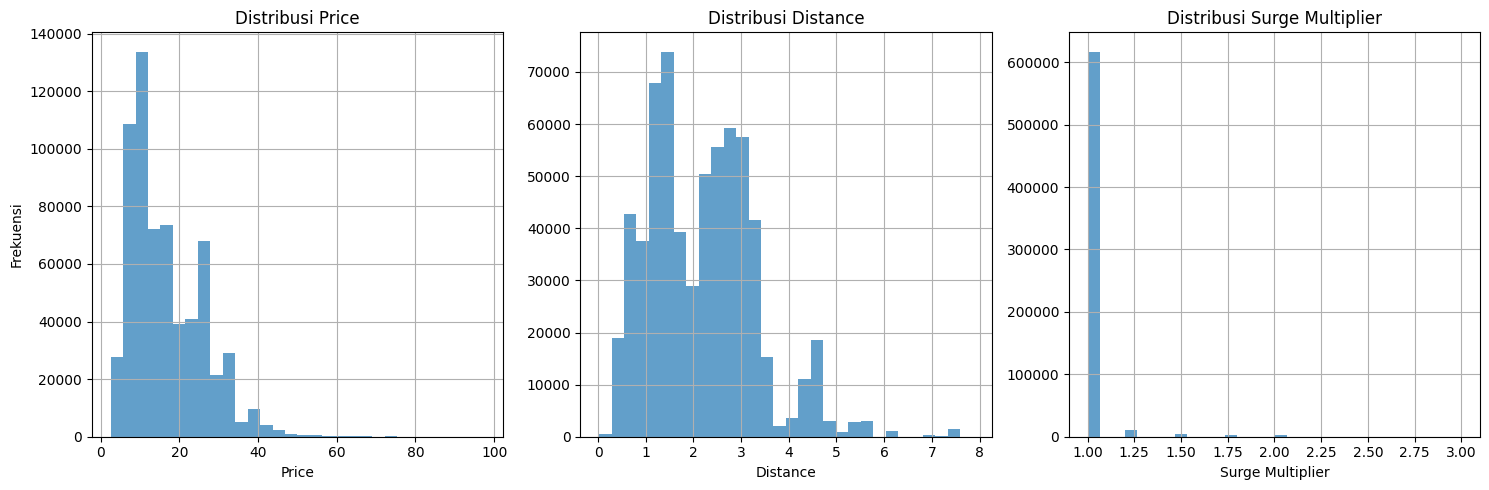

In [144]:
# Menampilkan Grafik Distribusi
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Memnggabungkan Grafik Distribusi
data['price'].hist(ax=axes[0], bins=30, alpha=0.7)
axes[0].set_title('Distribusi Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frekuensi')

data['distance'].hist(ax=axes[1], bins=30, alpha=0.7)
axes[1].set_title('Distribusi Distance')
axes[1].set_xlabel('Distance')

data['surge_multiplier'].hist(ax=axes[2], bins=30, alpha=0.7)
axes[2].set_title('Distribusi Surge Multiplier')
axes[2].set_xlabel('Surge Multiplier')

# Mengatur Layout
plt.tight_layout()

# Menampilkan Visualisasi
plt.show()

Interpretasi terhadap Visualisasi Distribusi data:
<ul><li>"price": Secara visual, terlihat data memiliki distribusi yang miring ke kanan dengan variabilitas yang cukup jauh, mengindikasikan terdapat sejumlah outlier yang terkait dengan data harga yang bernlai tinggi    
<li>"distance": Secara visual juga terlihat bahwa data cenderung tidak normal dan  memiliki distribusi yang miring ke kanan, atau terdapat outlier yang nilainya jauh lebih tinggi dari nilai rata-rata data    
<li>"surge_multiplier": Terlihat data tidak simetris, dengan nilai mayoritas berada hanya pada satu titik nilai, sedangkan sebagian kecil data memiliki nilai cukup ekstrim</ul>

### Mendeteksi Outlier

Price - Jumlah outliers: 5589, Presentase: 0.88%
Distance - Jumlah outliers: 6672, Presentase: 1.05%
Surge Multiplier - Jumlah outliers: 20975, Presentase: 3.29%


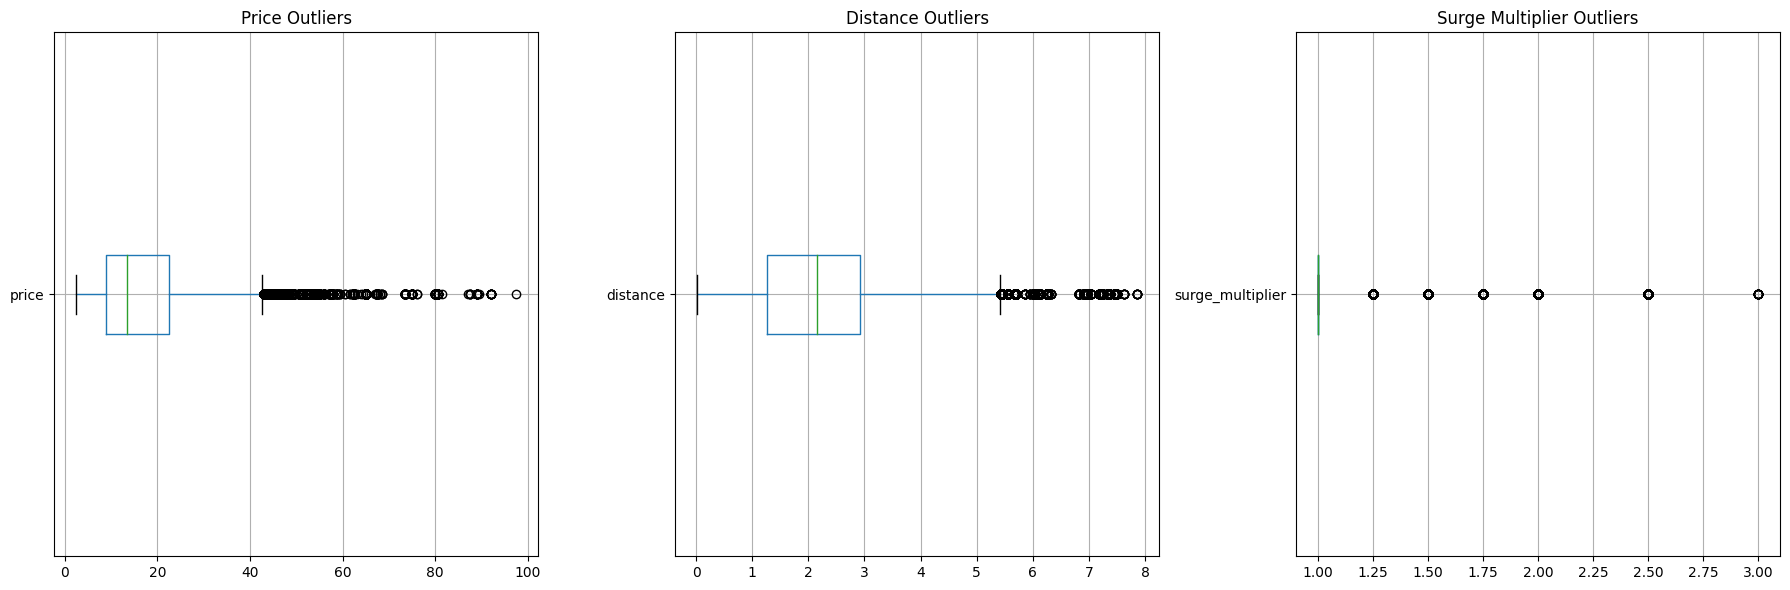

In [145]:
def detect_outliers_using_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (series < lower_bound) | (series > upper_bound)

def print_outlier_info(column_name, outliers):
    num_outliers = outliers.sum()
    percentage_outliers = (num_outliers / len(outliers)) * 100
    print(f"{column_name} - Jumlah outliers: {num_outliers}, Presentase: {percentage_outliers:.2f}%")

outliers_price = detect_outliers_using_iqr(data['price'])
print_outlier_info('Price', outliers_price)

outliers_distance = detect_outliers_using_iqr(data['distance'])
print_outlier_info('Distance', outliers_distance)

outliers_surge_multiplier = detect_outliers_using_iqr(data['surge_multiplier'])
print_outlier_info('Surge Multiplier', outliers_surge_multiplier)

# Visualisasi menggunakan boxplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

data.boxplot(column='price', ax=axes[0], vert=False)
axes[0].set_title('Price Outliers')

data.boxplot(column='distance', ax=axes[1], vert=False)
axes[1].set_title('Distance Outliers')

data.boxplot(column='surge_multiplier', ax=axes[2], vert=False)
axes[2].set_title('Surge Multiplier Outliers')

plt.tight_layout()
plt.show()

<ul>
<li>Berdasarkan data dan visualisasi diatas, untuk variabel "price" terlihat adanya outlier dengan presentase yang sangat kecil (tidak lebih dari 1%). Walaupun dari segi nilai cukup ekstrim, tetapi secara logis masih masuk akal dikarenakan hal ini bisa terkait dengan data perjalanan yang jauh ataupun perjalanan untuk kelas mewah, seperti diketahui layanan-layanan transportasi online memiliki kelas-kelas mewah yang harganya cukup jauh lebih tinggi dari kisaran rata-rata layanan standar. Sehingga dapat dikatakan outlier pada data ini sifatnya adalah natural.  
<li>Terkait dengan data "distance" dan "surge_multiplier" terlihat adanya nilai outlier yang cukup kecil juga, namun cenderung perlu dianalisis lebih lanjut dikarenakan jumlahnya melebihi 1% dari keseluruhan data. Dalam visualisasi juga terlihat adanya perjalanan-perjalanan yang cukup jauh dari rata-rata jarak tempuh normal, sedangkan untuk variabel "surge_multiplier" lebih banyak outlier mengindikasikan bahwa mayoritas data ini tidak memiliki cukup banyak tingkat lonjakan pada harga, sehingga perubahan lonjakan harga sedikit akan teridentifikasi sebagai outlier. 

### Analisis Korelasi

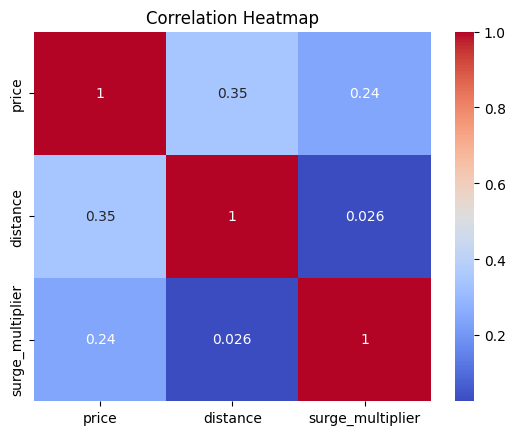

In [146]:
# Visualisasi Korelasi
correlation_matrix = data[["price", "distance", "surge_multiplier"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Analisis korelasi antara "price" vs "distance" vs "surge_multiplier"**    
<ul>
<li>"price" vs "distance": Koefisien korelasinya adalah 0,345061.      

Interpretasi: Terdapat korelasi positif moderat antara harga layanan dengan jarak perhalanan. Artinya, seiring bertambahnya jarak perjalanan, harga juga cenderung meningkat, dan hal ini masuk akal secara intuitif. Namun, hubungannya tidak terlalu kuat, menunjukkan bahwa ada faktor lain yang mempengaruhi harga selain jarak.   

<li>"price" vs. "surge_multiplier": Koefisien korelasinya adalah 0,240458.      

Interpretasi: Terdapat korelasi positif yang lemah antara harga dan variabel pengganda lonjakan harga. Hal ini menunjukkan bahwa ketika terjadi lonjakan harga (surge_multiplier > 1), maka harga juga cenderung naik. Namun korelasinya tidak terlalu kuat, artinya variabel lonjakan pengganda hanyalah salah satu faktor yang mempengaruhi tingkat harga.    

<li>"distance" vs "surge_multiplier": Koefisien korelasinya adalah 0,025946.      

Interpretasi: Terdapat korelasi positif yang lemah antara jarak dan variabel pengganda lonjakan harga. Artinya, jarak perjalanan tidak memiliki hubungannya yang kuat dengan ada atau tidaknya lonjakan harga tertentu. Lonjakan tersebut mungkin lebih terkait dengan faktor lain, seperti jam rush hour, permintaan dan penawaran pada waktu tertentu dibandingkan faktor jarak perjalanan.</ul>   

Secara singkat, terdapat hubungan yang paling kuat antara harga dan jarak, namun hubungan tersebut pun hanya bersifat moderat. Korelasi lainnya relatif lemah, yang menunjukkan bahwa meskipun faktor-faktor tersebut saling mempengaruhi sampai batas tertentu, namun faktor-faktor tersebut bukanlah satu-satunya faktor penentu. Faktor eksternal lainnya, yang tidak terdapat dalam matriks, juga dapat memainkan peran penting dalam menentukan variabel harga.

## Perbandingan Harga Berdasarkan tipe: Uber vs Lyft

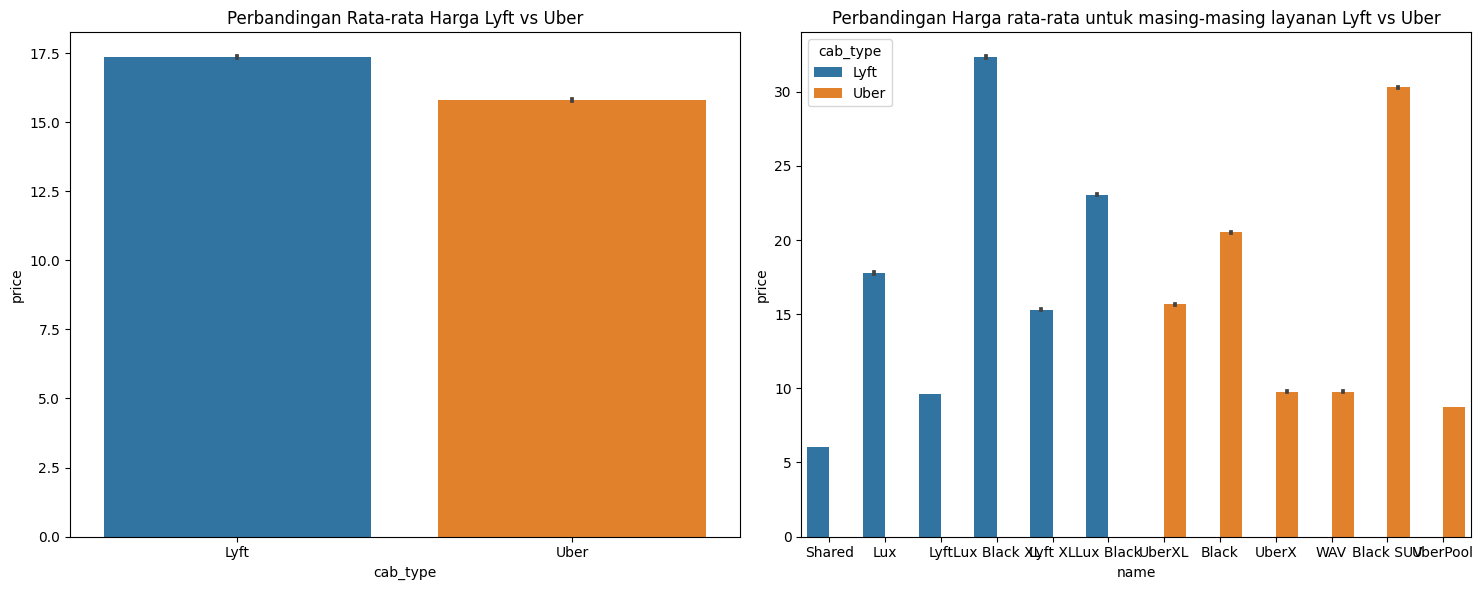

In [147]:
# Menampilkan Visualisasi Harga rata-rata Uber vs Lyft
plt.figure(figsize=(15, 6))

# Grafik 1 untuk menampilkan perbandingan antara rata-rata harga Perusahaan
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(data=data, x='cab_type', y='price')
plt.title('Perbandingan Rata-rata Harga Lyft vs Uber')

# Grafik 2 menampilkan Harga rata-rata untuk setiap Layanan
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(data=data, x='name', y='price', hue='cab_type')
plt.title('Perbandingan Harga rata-rata untuk masing-masing layanan Lyft vs Uber')

# Menampilkan Visualisasi
plt.tight_layout()
plt.show()

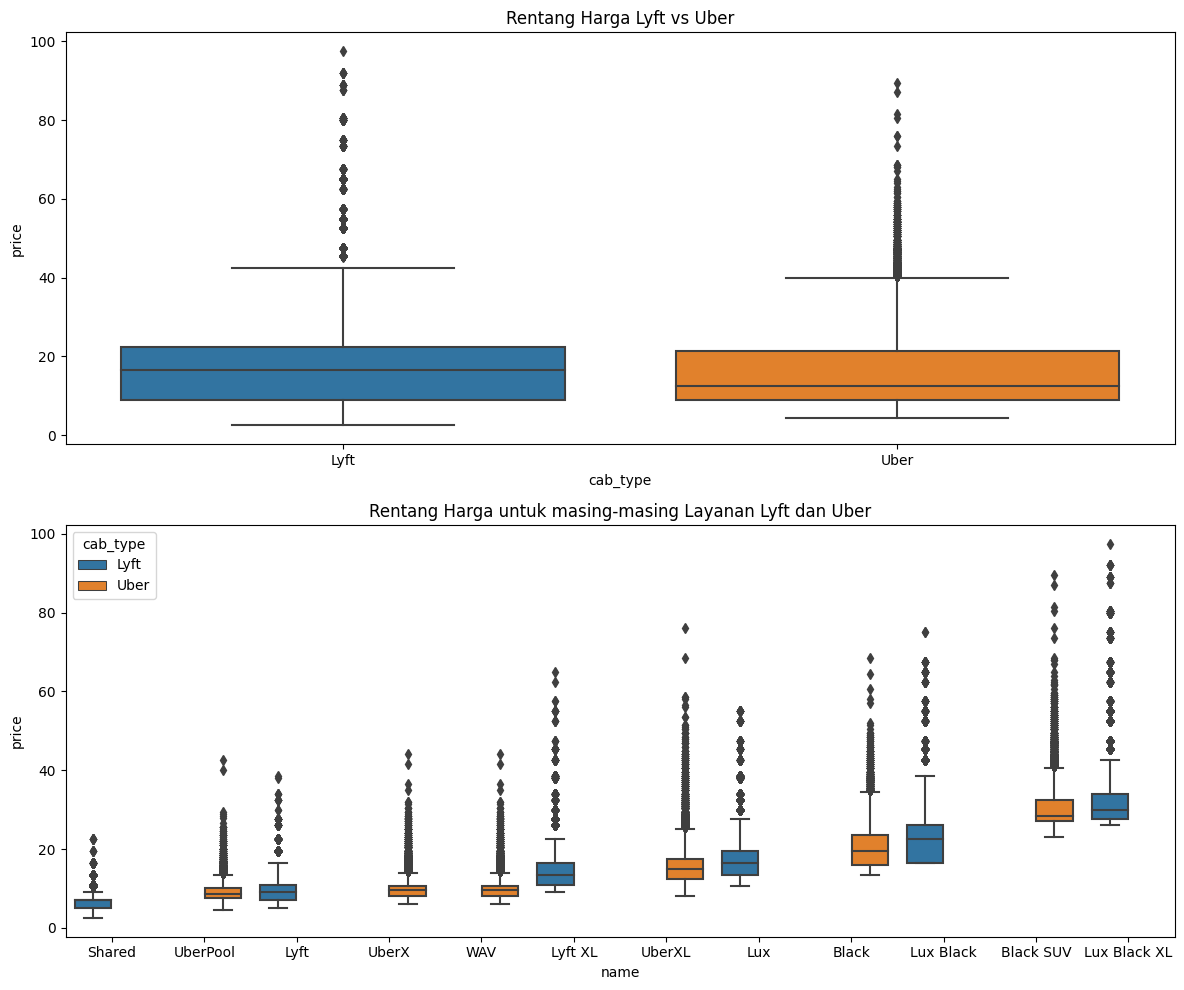

In [148]:
# Menampilkan distribusi Harga Uber vs Lyft
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Boxplot untuk menbandingkan rentang harga Lyft dan Uber
sns.boxplot(data=data, x='cab_type', y='price', ax=ax[0])
ax[0].set_title('Rentang Harga Lyft vs Uber')

# Menampilkan Grafik rentang harga untuk masing-masing Layanan
# (diurutkan berdasarkan nilai median)
sorted_names = data.groupby('name')['price'].median().sort_values().index.tolist()
sns.boxplot(data=data, x='name', y='price', hue='cab_type', order=sorted_names, ax=ax[1])
ax[1].set_title('Rentang Harga untuk masing-masing Layanan Lyft dan Uber')

# Menampilkan Visualisasi
plt.tight_layout()
plt.show()

In [149]:
# Mengelompokkan harga rata-rata untuk masing-masing layanan Uber
uber_data = data[data['cab_type'] == 'Uber']
uber_avg = uber_data.groupby('name')['price'].mean().sort_values().reset_index()
uber_avg.columns = ['Uber', 'average_price_uber']

# Mengelompokkan harga rata-rata untuk masing-masing layanan Lyft
lyft_data = data[data['cab_type'] == 'Lyft']
lyft_avg = lyft_data.groupby('name')['price'].mean().sort_values().reset_index()
lyft_avg.columns = ['Lyft', 'average_price_lyft']

# Membuat dataframe untuk menampilkan perbandingan antara rata-rata harga masing-masing layanan Uber dan Lyft
result = pd.concat([uber_avg, lyft_avg], axis=1)

# Menampilkan dataframe
print(result)

        Uber  average_price_uber          Lyft  average_price_lyft
0   UberPool            8.752500        Shared            6.029893
1        WAV            9.765019          Lyft            9.610885
2      UberX            9.765074       Lyft XL           15.309363
3     UberXL           15.678144           Lux           17.771240
4      Black           20.523786     Lux Black           23.062468
5  Black SUV           30.286763  Lux Black XL           32.324086


**Analisis Perbandingan Harga Uber vs Lyft:**    

Harga Rata-Rata Keseluruhan:    
Uber: $15,79     
Lyft: $17,35    
Interpretasi: Secara Rata-rata, harga untuk Lyft lebih mahal daripada Uber diperkirakan sekitar $1,56     

Perbandingan Harga berdasarkan layanan:      
Tingkat Layanan Terendah:      
UberPool (Uber): $8,7525     
Shared (Lyft): $6,0299     
Interpretasi: Untuk opsi yang paling terjangkau, "Shared" Lyft lebih murah daripada "UberPool" Uber sebesar $2,7226    

Layanan Dasar:     
UberX (Uber): $9,7651      
Lyft (Lyft): $9,6109      
Interpretasi: Untuk layanan dasar, harganya cukup kompetitif, dengan UberX sedikit lebih mahal daripada Lyft sebesar $0,1542    

Layanan Kendaraan dengan muatan lebih banyak:    
UberXL (Uber): $15,6781     
Lyft XL (Lyft): $15,3094     
Interpretasi: Untuk opsi kendaraan yang lebih besar, UberXL sedikit lebih mahal daripada Lyft XL sebesar $0,3687     

Layanan Mewah:      
Black (Uber): $20,5238     
Lux (Lyft): $17,7712   
Interpretasi: Opsi mewah Uber "Black" lebih mahal daripada "Lux" Lyft sebesar $2,7526    

Opsi Mewah Kelas Atas:      
Black SUV (Uber): $30,2868     
Lux Black (Lyft): $23,0625     
Interpretasi: Opsi kemewahan kelas atas Uber "Black SUV" jauh lebih mahal daripada "Lux Black" Lyft sebesar $7,2243      

Opsi Paling Mewah:      
Uber tidak memiliki layanan setara dengan Lyft dalam data ini     
Lux Black XL  (Lyft): $32,3241     
Interpretasi: Harga yang ditawarkan Lyft untuk opsi yang paling mewah dengan "Lux Black XL" adalaah seharga $32,3241


Di layanan termurah, Lyft menawarkan layanan yang lebih terjangkau. Sedangkan pada layanan dasar dan menengah, harga antara Uber dan Lyft cukup kompetitif, dengan sedikit perbedaan. Untuk layanan mewah, Uber secara garis besar memiliki harga lebih mahal dibandingkan Lyft.

## Perbandingan Harga dengan variabel waktu

In [150]:
# Membuat variabel keterangan waktu berdasarkan jam
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
data['time_of_day'] = pd.cut(data['hour'], bins=bins, labels=labels, right=False)

In [151]:
# Membuat Variabel nama hari
data['day_of_week'] = data['datetime'].dt.day_name()

Menampilkan Visualisasi untuk melakukan analisis terhadap rata-rata perubahan harga setiap jam untuk dapat mengidentifikasi kapan waktu rush hour atau waktu dengan permintaan tertinggi dan kapan waktu-waktu paling sepi terjadi.

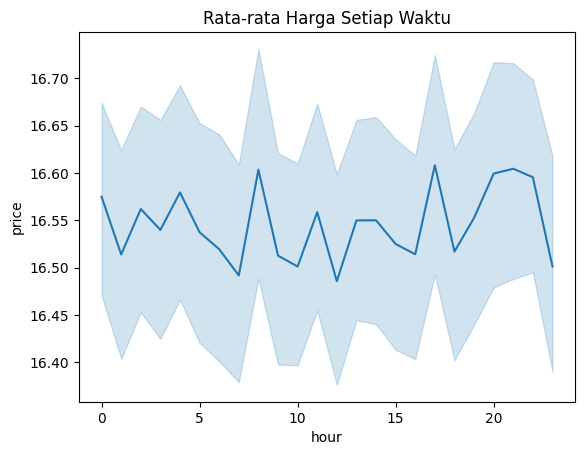

In [152]:
sns.lineplot(x='hour', y='price', data=data)
plt.title('Rata-rata Harga Setiap Waktu')
plt.show()

**Perbandingan Harga rata-rata berdasarkan jam:**   
Harga rata-rata tidak menunjukkan variasi yang besar pada jam yang berbeda. Harganya berkisar sekitar $16,5. Harga rata-rata tertinggi terlihat pada pukul 17.00 dan pukul 21.00 dengan nilai masing-masing sekitar $16.6, ini bisa jadi merupakan saat-saat dimana permintaan lebih tinggi dari biasanya (rush hour). Rata-rata harga terendah terjadi pada siang hari sekitar jam 11-12 dengan rata-rata harga sekitar $16.4.

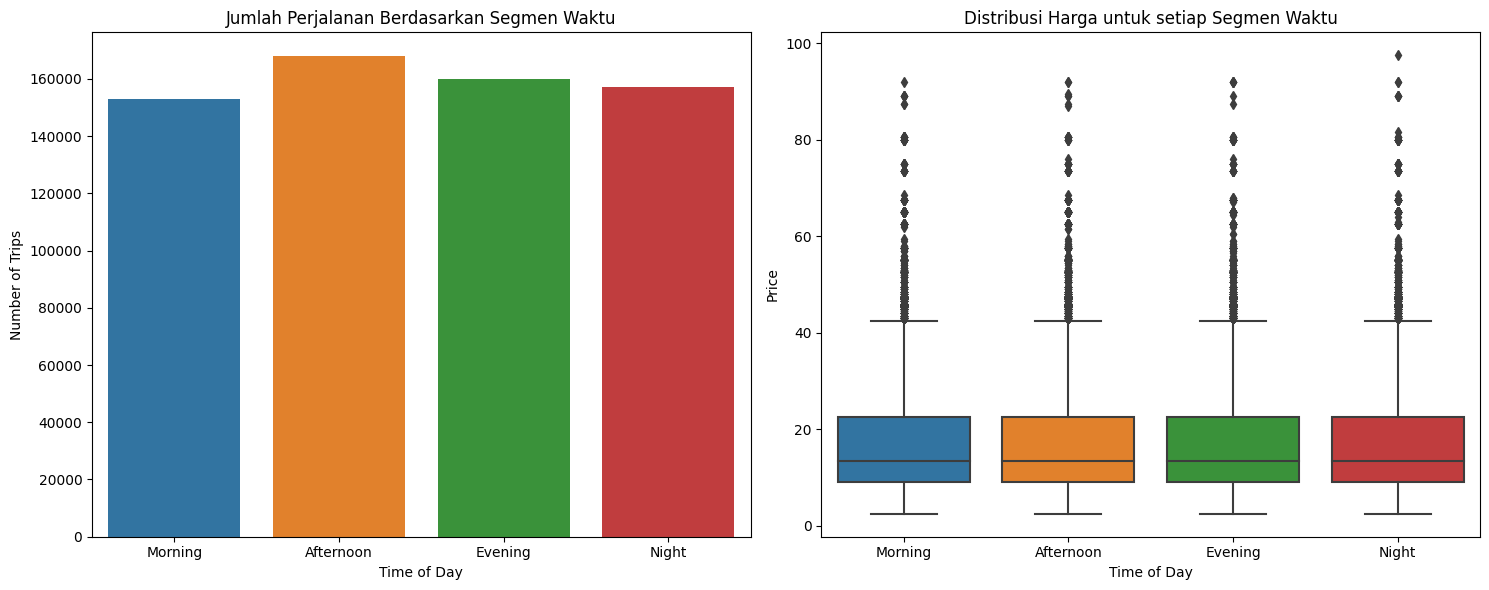

In [153]:
# Menampilkan visualisasi harga berdasarkan segmen waktu
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Visualisasi Jumlah perjalanan per segmen 
sns.countplot(x='time_of_day', data=data, order=['Morning', 'Afternoon', 'Evening', 'Night'], ax=axes[0])
axes[0].set_title('Jumlah Perjalanan Berdasarkan Segmen Waktu')
axes[0].set_ylabel('Number of Trips')
axes[0].set_xlabel('Time of Day')

# Visualisasi Distribusi Harga per segmen
sns.boxplot(x='time_of_day', y='price', data=data, order=['Morning', 'Afternoon', 'Evening', 'Night'], ax=axes[1])
axes[1].set_title('Distribusi Harga untuk setiap Segmen Waktu')
axes[1].set_ylabel('Price')
axes[1].set_xlabel('Time of Day')


plt.tight_layout()

# Menampilkan Visualisasi
plt.show()

**Jumlah Perjalanan dan Distribusi Harga per Segmen Waktu:**     
<ul>
<li>Periode "Afternoon" atau pada siang dan sore tercatat sebagai jumlah perjalanan tertinggi dengan sekitar 167 ribu lebih perjalanan. Hal ini dapat disebabkan oleh berbagai alasan seperti berkaitan dengan jam orang yang pulang kerja atau aktivitas harian.  
<li>Periode "Evening" atau malam hari merupakan urutan kedua dengan sekitar 157 ribu total perjalanan. Dari segi harga, untuk harga secara garis besar tidak terlalu terlihat adanya beda yang signifikan antara pagi, siang, dan malam.      
<li>Periode "Morning" atau pagi hari tercatat sebagai perjalanan paling sedikit dengan sekitar 152 ribu perjalanan. Hal ini mungkin pada pagi hari orang lebih memilih moda transportasi lain dikarenakan trasnportasi umum lainnya masih beroperasi dan tidak terlalu ramai.    
<li>Layanan ride-hailing pada data ini tampaknya mempertahankan permintaan yang relatif konsisten sepanjang waktu, tanpa adanya puncak atau titik terendah yang besar. Perbedaan antara periode tersibuk (Sore) dan periode paling tidak sibuk (Pagi) tidak terlalu besar, sehingga menunjukkan distribusi permintaan yang cukup seimbang.    
<li>Terkait distribusi harga, juga tidak terlalu kelihatan berbeda dari segi rata-rata pada setiap waktu, hanya saja banyak harga yang berada jauh diatas rata-rata untuk setiap waktu yang mungkin terindikasi adanya perjalanan-perjalanan jarak jauh atau adanya perjalanan dengan transportasi kelas mewah yang dimiliki layanan Lyft maupun Uber.

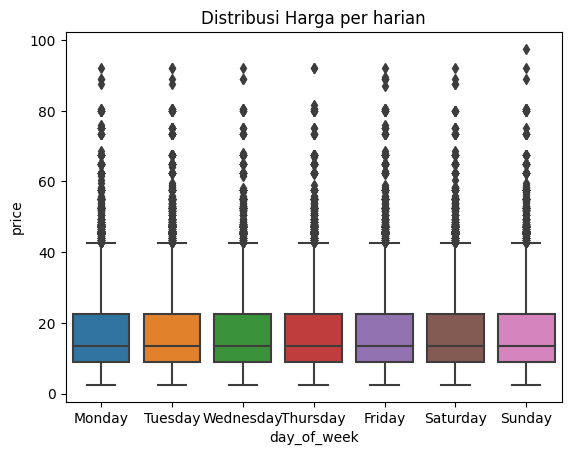

In [154]:
# Boxplot Untuk Visualisasi Distribusi Harga per harian
sns.boxplot(x='day_of_week', y='price', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribusi Harga per harian')
plt.show()

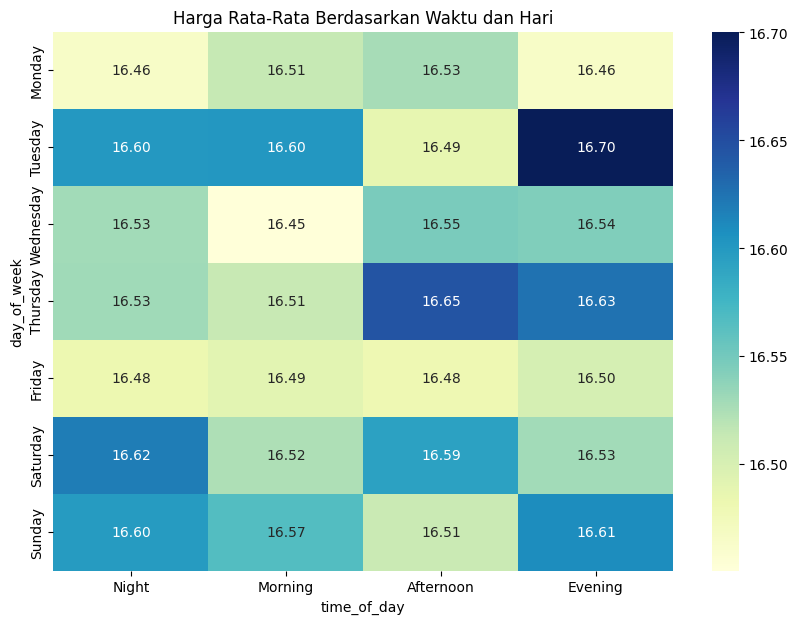

In [155]:
# Visualisasi untuk Menampilkan Rata-rata harga per waktu
pivot_data_day = data.groupby(['day_of_week', 'time_of_day'])['price'].mean().unstack()

# Mengurutkan visualisasi berdasarkan hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Membuat heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_data_day.reindex(day_order), cmap='YlGnBu', annot=True, fmt=".2f")  # "annot" to annotate each cell with the numeric value, "fmt" to format the annotation
plt.title('Harga Rata-Rata Berdasarkan Waktu dan Hari')
plt.show()

Berdasarkan data rata-rata harga perjalanan yang disegmentasi berdasarkan hari dan waktu, hasil pengamatannya adalah sebagai berikut:

Kisaran Harga:    
Harga rata-rata untuk setiap hari dan waktu tampaknya berkisar pada kisaran $16,5 hingga $16,7, tidak ada variasi harga yang besar pada hari dan waktu yang berbeda, mengindikasikan harga rata-rata tampaknya relatif konsisten setiap hari, kapan pun waktunya.

Variasi Hari:    
Sabtu dan Minggu (Akhir Pekan): Hari-hari ini memiliki harga rata-rata yang sedikit lebih tinggi pada malam hari dibandingkan hari-hari lainnya. Sabtu malam memiliki harga rata-rata relatif cukup tinggi sepanjang minggu, sedangkan Rabu waktu pagi hari meiliki harga rata-rata terendah dalam seminggu.

Membandingkan Siang dan Malam:     
Hampir setiap hari, Senin sampai dengan Jumat, memiliki harga yang sangat relatif stabil untuk siang dan malam. Namun, pada hari Sabtu, terjadi kenaikan harga yang relatif tinggi pada malam hari dibandingkan pada pagi hari.

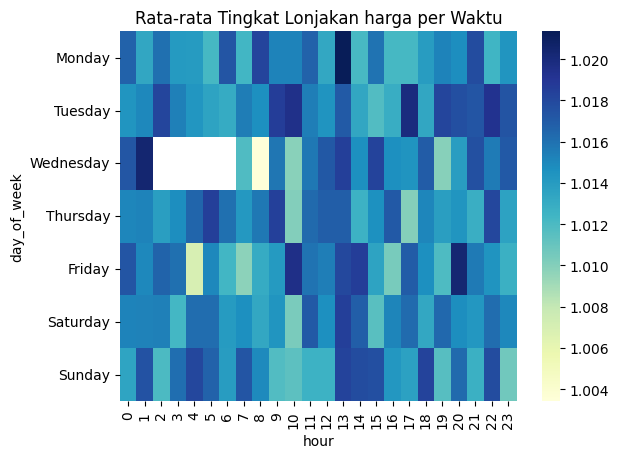

In [156]:
# Menginisiasikan Urutan data hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Visualisasi untuk Mendeteksi lonjakan harga per waktu
heatmap_data = data.groupby(['day_of_week', 'hour'])['surge_multiplier'].mean().unstack()
sns.heatmap(heatmap_data.reindex(day_order), cmap='YlGnBu')
plt.title('Rata-rata Tingkat Lonjakan harga per Waktu')
plt.show()

Dari data diatas dapat diidentifikasi bahwa:<ul>
<li>Antara jam 12 siang hingga jam 14 siang merupakan waktu dengan rata-rata tingkat lonjakan harga tertinggi setiap harinya, khususnya pada hari Senin.
<li>Pada hari selasa antara jam 17 sore hingga jam 23 malam juga merupakan hari dan waktu dengan rata-rata tingkat lonjakan harga yang tinggi.
<li>Antara jam 19 malam hingga jam 22 malam merupakan waktu dengan rata-rata tingkat lonjakan harga tertinggi pada hari kerja (senin-jumat).     

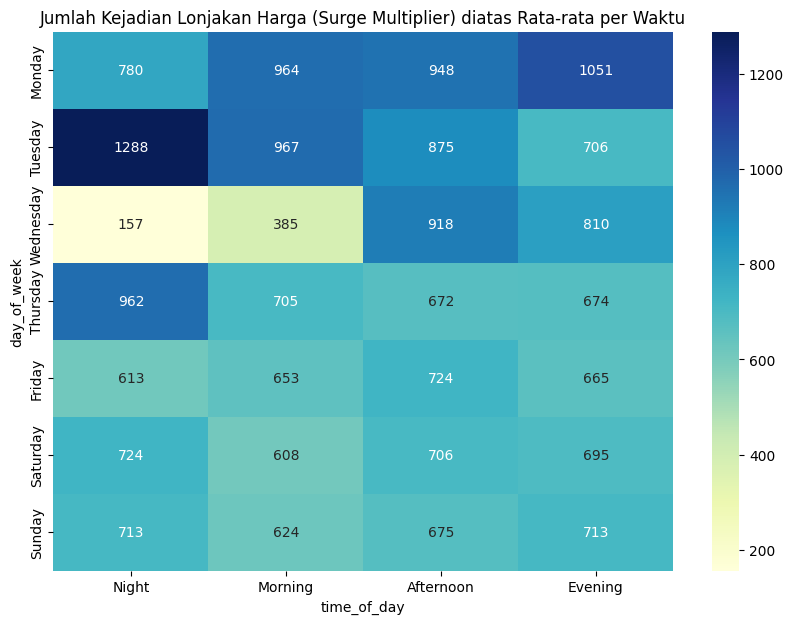

In [157]:
# Memfilter data berdasarkan peningkatan angka surge_multiplier diatas rata-rata. 
average_surge = data['surge_multiplier'].mean()
filtered_surge = data[data['surge_multiplier'] > average_surge]

# Mengelompokkan data untuk menghitung jumlah data "surge_multiplier"
pivot_data_surge = filtered_surge.groupby(['day_of_week', 'time_of_day']).size().unstack().fillna(0)

# Mengurutkan Data hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Memvisualisasikan Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_data_surge.reindex(day_order), cmap='YlGnBu', annot=True, fmt="g")
plt.title('Jumlah Kejadian Lonjakan Harga (Surge Multiplier) diatas Rata-rata per Waktu')
plt.show()

Berdasarkan data diatas yang menunjukkan jumlah nilai "surge_multiplier" di atas rata-rata untuk hari dan waktu yang berbeda, dapat disimpulkan hal berikut:<ul>   
<li>Hari Tertinggi: Hari Selasa tampaknya merupakan hari dengan frekuensi tingkat lonjakan harga tertinggi di atas rata-rata, terutama pada malam hari. Pada hari Senin juga menunjukkan angka yang relatif tinggi, terutama pada sore dan malam hari.    
<li>Hari Terendah: Rabu adalah salah satu hari dengan tingkat frekuensi lonjakan terendah pada malam dan pagi hari. Angka ini jauh lebih rendah dibandingkan hari-hari lainnya pada waktu yang sama. Pada Sabtu pagi dan Minggu pagi, juga terlihat memiliki tingkat frekuensi lonjakan harga yang relatif rendah.</ul>

Variasi Waktu:<ul>
<li>Lonjakan harga secara umum lebih sering terlihat pada Malam hari, khususnya pada hari kerja seperti Senin dan Selasa, hal ini mungkin terkait permintaan yang lebih tinggi atau berkurangnya ketersediaan transportasi selama masa-masa ini. Sore hari hanya terlihat terjadi lonjakan harga pada hari Semin dan Rabu.


## Analisis Harga per Wilayah

In [158]:
# Menghitung wilayah dengan Rute perjalanan yang paling sering dilalui
route_counts = data.groupby(['source', 'destination']).size().reset_index(name='total_trips')

# Menampilkan peringkat 10 besar
top_routes = route_counts.sort_values(by='total_trips', ascending=False).head(10)
top10_routes = top_routes.reset_index(drop=True)

print("Rute Perjalanan dengan Intensitas Tertinggi\n")
print(top10_routes)


Rute Perjalanan dengan Intensitas Tertinggi

               source         destination  total_trips
0       South Station  Financial District         9534
1  Financial District       South Station         9534
2           North End            Back Bay         9414
3            Back Bay           North End         9414
4            West End              Fenway         9360
5              Fenway            West End         9360
6    Haymarket Square  Financial District         9330
7  Financial District    Haymarket Square         9329
8         Beacon Hill           North End         9240
9           North End         Beacon Hill         9240


Tabel data diatas menampilkan 10 rute perjalanan yang paling sering pada data platform ride-hailing. Berikut interpretasinya:<ul>
<li>South Station ke Financial District dan sebaliknya, Financial District ke South Station, adalah dua rute teratas yang paling sering dikunjungi, keduanya dengan 9534 perjalanan. Hal ini menunjukkan bahwa South Station dan Financial District memiliki volume perjalanan yang tinggi di antara keduanya. 
<li>Rute yang paling sering dikunjungi berikutnya adalah antara North End dan Back Bay (dan sebaliknya) dengan 9414 perjalanan di setiap arah. 
<li>West End ke Fenway dan kebalikannya, Fenway ke West End, juga menjadi yang tertinggi dengan total 9360 perjalanan.
<li>Haymarket Square ke Financial District memiliki 9330 perjalanan, sedangkan rute sebaliknya, Financial District ke Haymarket Square, memiliki satu perjalanan lebih sedikit yaitu 9329.</ul>   

Lokasi-lokasi yang disebutkan di atas merupakan lokasi yang paling sering dikunjungi, sehingga menunjukkan bahwa lokasi tersebut mungkin merupakan pusat komersial, transportasi, atau perumahan, atau memiliki area hiburan publik atau lokasi penting lainnya.

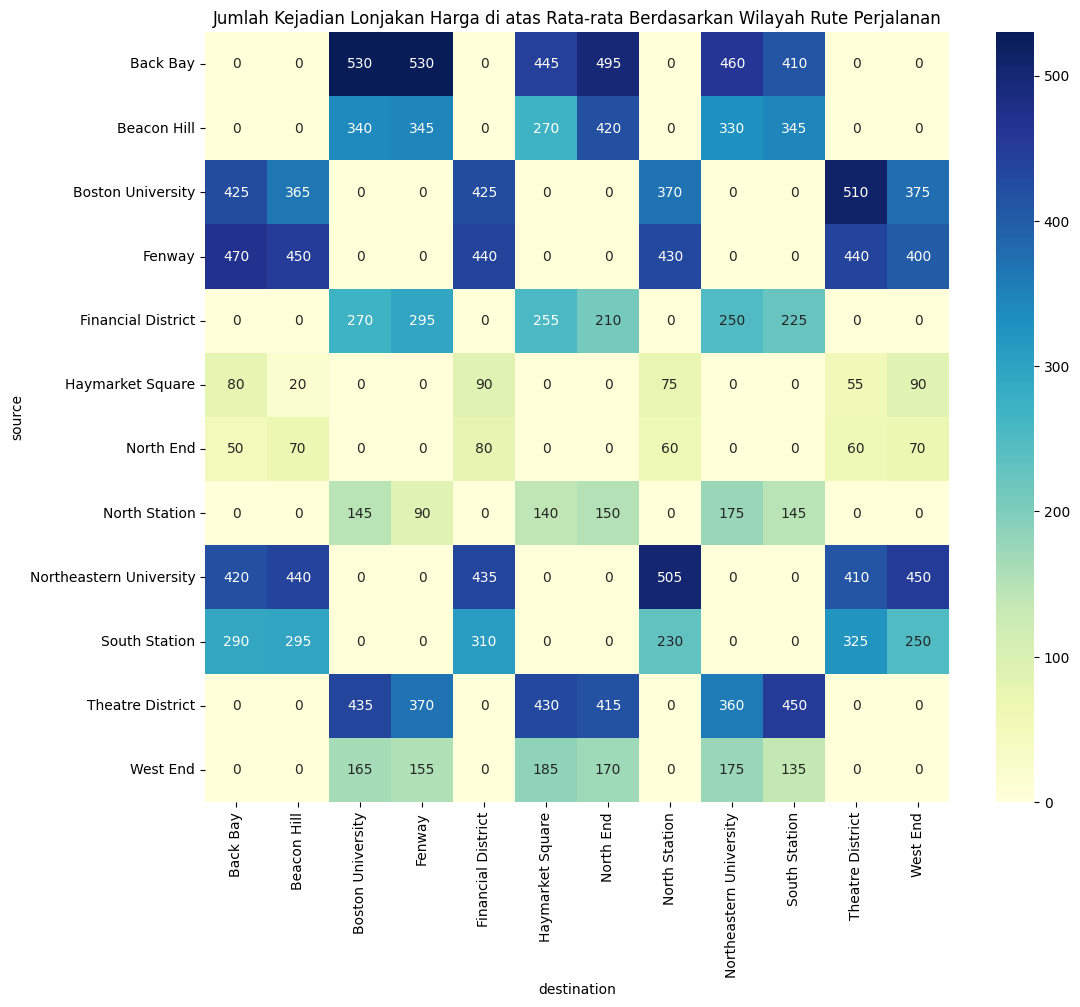

In [159]:
# Menghitung nilai rata-rata lonjakan harga
avg_surge = data['surge_multiplier'].mean()

# Mmefilter data dengan nilai lonjakan harga melebihi rata-rata
filtered_surge_loc = data[data['surge_multiplier'] > avg_surge]

# Membuat tabel untuk mengidentifikasi "source" dan "destination" yang memiliki lonjakan harga diatas rata-rata
pivot_data_loc = filtered_surge_loc.groupby(['source', 'destination']).size().unstack().fillna(0)
pivot_data_loc = pivot_data_loc.astype(int)

# Memvisualisasikan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_data_loc, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Jumlah Kejadian Lonjakan Harga di atas Rata-rata Berdasarkan Wilayah Rute Perjalanan')
plt.show()

Data diatas merupakan matriks yang mewakili jumlah perjalanan (dengan surge_multiplier yang melebihi rata-rata) dari satu lokasi (sumber) ke lokasi lain (tujuan) dalam platform ride-hailing.

**Interpretasi data:**
<ul>
<li>Rute Perjalanan dengan intensitas lonjakan harga yang Tinggi:
Rute perjalanan dari lokasi Back Bay adalah rute paling sering terjadi lonjakan harga diatas rata-rata.
Dari Lokasi Boston University ke Theatre District, terdapat 510 perjalanan yang terjadi lonjakan harga di atas rata-rata. Rute ini juga dapat dianggap sebagai salah satu rute dengan lonjakan harga yang paling sering. Begitu pula dari lokasi Northeastern University ke North Station, terdapat 505 perjalanan dengan lonjakan harga melebihi rata-rata.
<li>Tidak Ada lonjakan harga: Ada beberapa lokasi dengan perjalanan yang tidak memiliki lonjakan harga. Misalnya, dari Back Bay ke Beacon Hill atau dari Financial District ke Fenway, tidak ada sama sekali perjalanan dengan tingkat lonnjakan harga.
<li>Area yang Lebih Banyak Lonjakannya: Area seperti Boston University, Back Bay, Northeastern University, dan Fenway, sering kali memiliki jumlah lonjakan yang tinggi, yang menunjukkan bahwa area tersebut mungkin merupakan titik rawan lonjakan harga atau mungkin disebabkan kepadatan lalu lintas di area tersebut.

## Analisis Harga Berdasarkan Kondisi Cuaca

In [160]:
# Mengelompokkan Data terkait Temperatur
temperature_data = data[["price", "temperature", "apparentTemperature", "temperatureHigh", "temperatureLow", "apparentTemperatureHigh", "apparentTemperatureLow", "temperatureMin", "temperatureMax", "apparentTemperatureMin", "apparentTemperatureMax"]]

# Perhitungan Korelasi
correlation_matrix = temperature_data.corr()

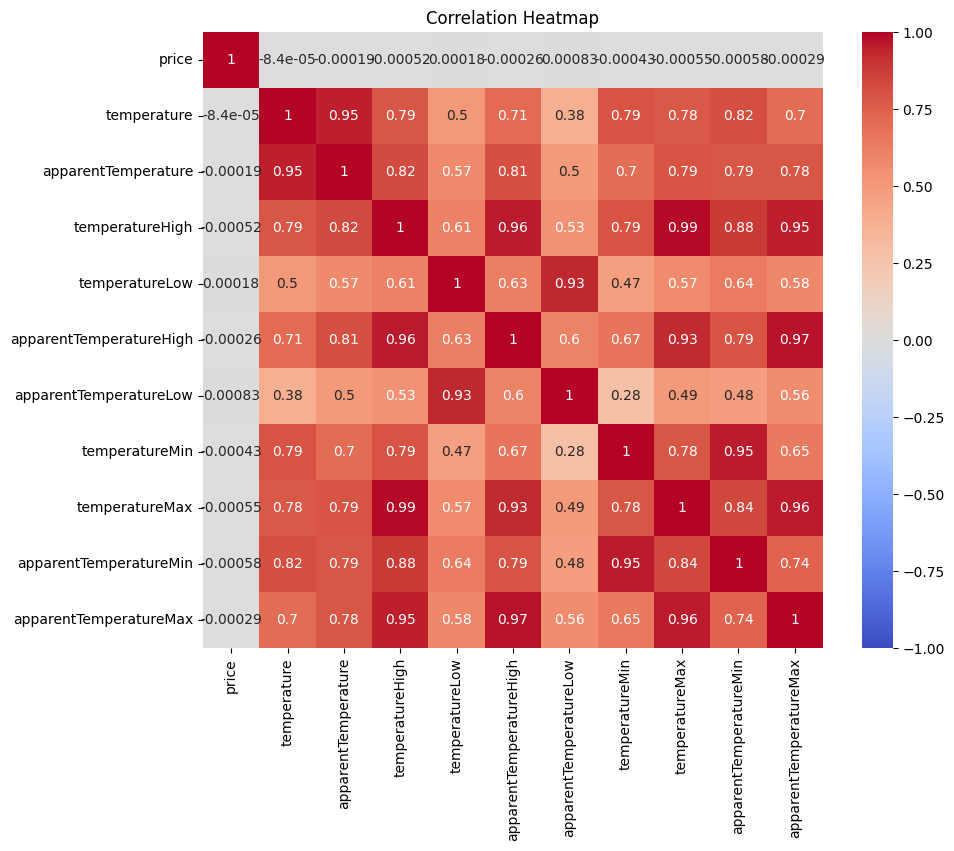

In [161]:
# Menganalisis Korelasi antara Harga dengan Variabel terkait Temperatur suhu udara
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()

**Analisis Korelasi:**<ul>
<li>harga vs. temperatur: Korelasinya kira-kira -0,000084. Angka ini sangat mendekati nol, menunjukkan bahwa hampir tidak ada hubungan linier antara suhu saat ini dengan harga platform ride-hailing.
<li> harga vs. apparentTemperature: Demikian pula, dengan korelasi -0,000193, bisa dikatakan hampir tidak ada hubungan apa pun.
<li> harga vs temperatureHigh: Korelasinya -0,000516. Artinya, seiring meningkatnya suhu tinggi, harga sedikit turun, namun hubungan ini sangat lemah.
<li>harga vs. temperatureLow: Korelasi sebesar 0,000182 menunjukkan hubungan linier positif yang dapat diabaikan.</ul>

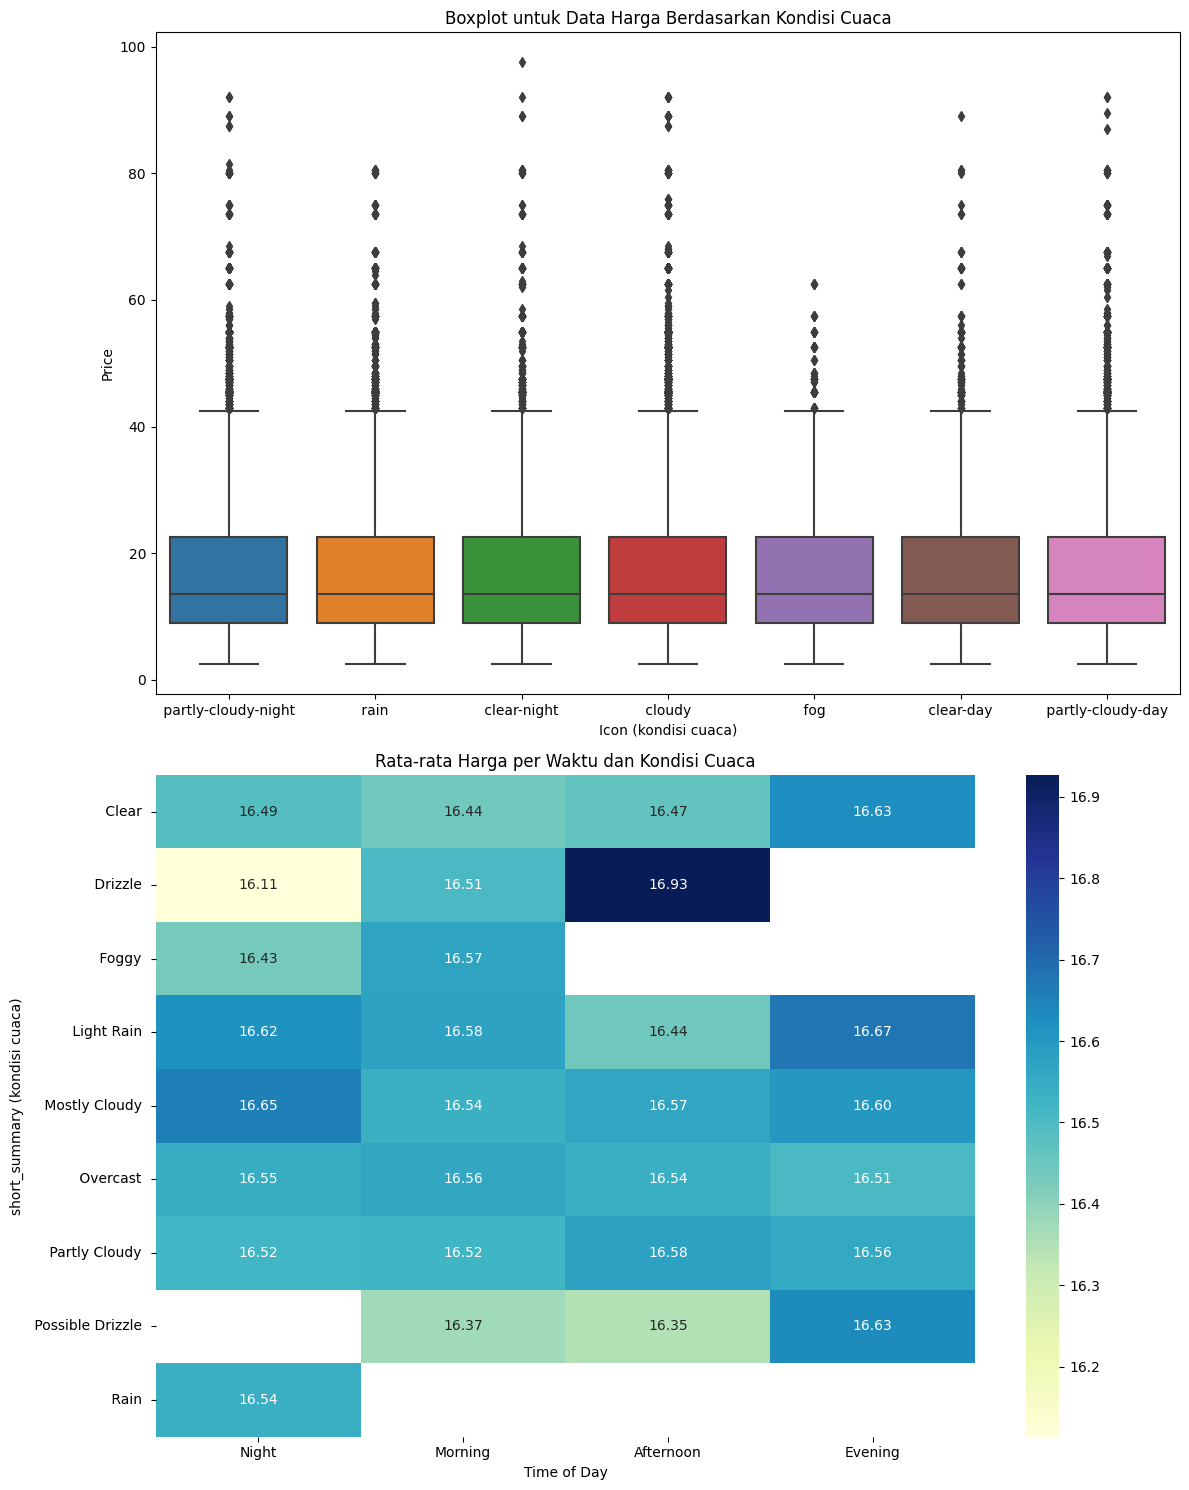

In [162]:
# Visualisasi data harga berdasarkan kondisi cuaca
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))

# Grafik Pertama untuk Boxplot untuk perbandingan antara variabel "price" and "icon" (data kondisi cuaca)
sns.boxplot(x="icon", y="price", data=data, ax=ax[0])
ax[0].set_title('Boxplot untuk Data Harga Berdasarkan Kondisi Cuaca')
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Icon (kondisi cuaca)')

# Grafik Kedua untuk Heatmap yang menampilkan Harga rata-rata berdasarkan kondisi cuaca "short_summary" dan informasi waktu "time_of_day"
pivot_table_weather = data.pivot_table(index='short_summary', columns='time_of_day', values='price', aggfunc='mean')
sns.heatmap(pivot_table_weather, cmap="YlGnBu", annot=True, fmt=".2f", ax=ax[1])
ax[1].set_title('Rata-rata Harga per Waktu dan Kondisi Cuaca')
ax[1].set_ylabel('short_summary (kondisi cuaca)')
ax[1].set_xlabel('Time of Day')

plt.tight_layout()
plt.show()


Secara umum, harga rata-rata pada kondisi cuaca dan waktu yang berbeda tidak berbeda secara signifikan satu sama lain, yaitu pada kisaran $16,4-$16,7. Berikut rincian penjelasannya:<ul>   
<li>Clear: Perjalanan saat cuaca cerah umumnya memiliki harga berkisar antara $16,4-$16,6, dengan malam hari sedikit lebih mahal dibanding pagi dan siang.
<li>Drizzle: Cuaca gerimis pada malam dan pagi hari tidak memiliki efek terhadap harga, tetapi harga melonjak hingga sekitar 16,93 apabila gerimis pada sore hari.
<li>Foggy: Cuaca berkabut pada data menunjukkan tidak ada pengaruh yang besar terhadap perubahan harga.
<li>Light Rain : Hujan ringan tampaknya sedikit menaikkan harga sepanjang waktu, dengan harga tertinggi terjadi pada malam hari sebesar $16.67.
<li>Mostly Cloudy: Harga tetap cukup konsisten di sekitar $16,5-$16,6, pada saat cuaca berawan kapan pun waktunya.
<li>Overcast: Kondisi mendung juga terlihat tidak mempengaruhi harga, sekitar $16,5-$16,56 pada waktu yang berbeda.
<li>Partly Cloudy : Harga pada kondisi sebagian berawan juga terlihat tidak mempengaruhi harga kapan pun waktunya.
<li>Possible Drizzle: Pada saat malam hari cuaca potensi gerimis mepengaruhi sedikit kenaikan harga.
<li>Rain: Hanya data hujan malam yang tersedia, dengan harga sekitar $16.54 relatif sama dengan kondisi cuaca yang lain.</ul>    

Gerimis di sore hari nampaknya merupakan harga tertinggi yang ditemukan. Hal ini dapat disebabkan oleh peningkatan permintaan kendaraan selama cuaca hujan, atau mungkin karena kondisi lalu lintas yang lebih lambat sehingga menambah durasi perjalanan.    

Meskipun ada perbedaan harga rata-rata antara kondisi cuaca dan waktu dapat diamati, namun perbedaan tersebut tidak terlalu mencolok. Hal ini dapat berarti bahwa faktor selain cuaca dan waktu mungkin memainkan peran yang lebih penting dalam menentukan harga perjalanan.

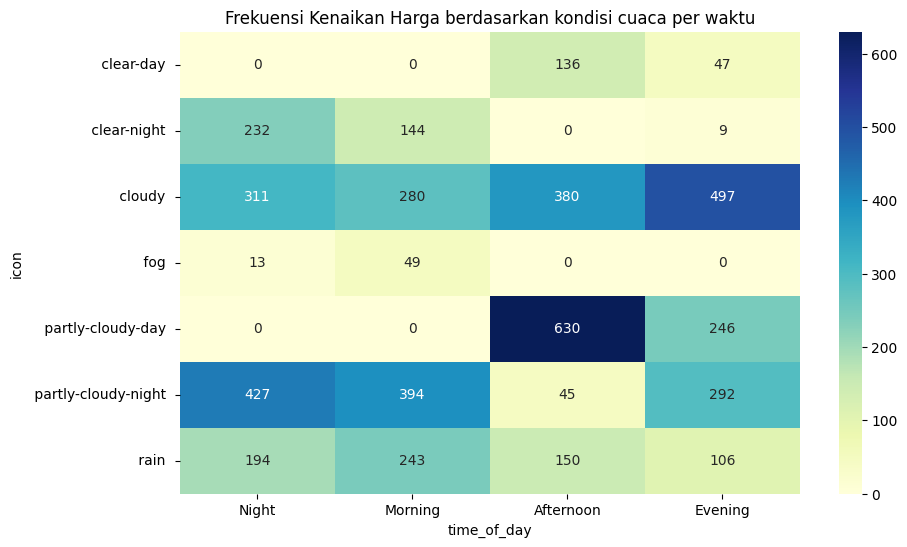

In [163]:
# Memvisualisasikan antara kondisi cuaca dengan tingkat lonjakan harga
# Step 1: Memfilter data dengan tingkat lonjakan harga 1,5 kali dari harga normal
average_multiplier = data['surge_multiplier'].mean()
filtered_weather = data[data['surge_multiplier'] > 1.5]

# Step 2: Mengelompokkan datanya
pivot_weather = filtered_weather.groupby(['icon', 'time_of_day']).size().unstack(fill_value=0)

# Step 3: Visualsiasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_weather, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Frekuensi Kenaikan Harga berdasarkan kondisi cuaca per waktu')
plt.show()

Grafik diatas menunjukkan jumlah kejadian saat surge_multiplier meningkat, dikelompokkan berdasarkan kondisi cuaca berbeda dan waktu yang berbeda. Berikut interpretasi datanya:<ul>
<li>Pada kondisi cuaca berawan terlihat secara konsisten menyebabkan lonjakan harga sepanjang hari, dengan kejadian tertinggi pada malam hari.
<li>Kondisi curah hujan pada pagi hari juga terlihat terjadi lonjakan harga paling sering dibandingan pada siang dan malam hari, yang mungkin menunjukkan bahwa pada pagi hari saat hujan terjadi peningkatan permintaan.
<li>Cuaca berawan tampaknya memiliki intensitas lonjakan harga yang cukup konsisten sepanjang waktu, yang dapat menunjukkan bahwa kondisi cuaca ini secara konsisten memengaruhi permintaan trasnportasi. Sebaliknya, kondisi cuaca berkabut dan cerah konisisten tidak mempengaruhi intensitas lonjakan harga yang signifikan. </ul>

Jika membandingkan berdasarkan intensitas, pada hari dengan kondisi berawan pada sore hari dan berawan pada malam hari menunjukkan lonjakan harga yang terbanyak. Hal ini menunjukkan bahwa kombinasi cuaca dan waktu tertentu mungkin yang paling berdampak dalam menyebabkan lonjakan terhadap harga.     

Singkatnya, data menunjukkan bahwa kondisi cuaca dan waktu memiliki pengaruh terhadap intensitas lonjakan harga. Akan tetapi, lonjakan tersebut tidak terjadi secara seragam di semua kondisi dan waktu cuaca; sebaliknya, kombinasi tertentu (misalnya pada malam hari berawan atau pagi hari berkabut) mengalami lebih banyak lonjakan, yang mungkin disebabkan oleh berbagai alasan seperti meningkatnya permintaan dari penumpang atau berkurangnya pasokan dari pengemudi.

# v. Feature Engineering

**Split/memisahkan data**

In [164]:
# Memisahkan Variabel Target dan Prediktor
X = data.drop(columns=['price'])
y = data['price']

# Memisahkan data training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Jumlah data Training :", len(X_train))
print("Jumlah data set:", len(X_test))

Jumlah data Training : 510380
Jumlah data set: 127596


## Handle Missing Value

In [165]:
# Mengecek data missing value 
missing_values = X_train.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Tidak ditemukan mssing value di dalam data ini
Selama fase Analisis Data Eksplorasi (EDA), diamati bahwa baris yang terkait dengan "Taxi" di kolom "name" tidak memiliki nilai pada kolom "price". Data yang hilang ini adalah variabel target dalam analisis ini.
Mengingat tidak ditemukan informasi yang relevan terkait dengan data tersebut, maka dianggap tidak tepat untuk dimemasukkan kedalam model regresi, karena strategi imputasi apa pun dapat menimbulkan bias dan menurunkan keandalan prediksi analisis ini. Oleh karena itu, data terkait "Taxi" telah dihapus sebelumnya. Tindakan ini diambil sebelum pemisahan data menjadi set training dan test data untuk memastikan konsistensi.

Dengan menghapus entri "Taxi" pada tahap EDA, ini memastikan bahwa kumpulan data training dan testing tidak berisi baris dengan nilai target yang hilang. Hal ini menjaga integritas kumpulan data ini, sehingga membuat pemodelan prediktif terhindar dari bias daripada membuat asumsi atau menggunakan strategi imputasi yang dapat menimbulkan bias pada model ini.

## Feature Creation

Berdasarkan analisis pada tahap EDA, dapat diidentifikasi bahwa terdapat keterkaitan antara hari-hari dan waktu tertentu terhadap variabel harga. Terkait dengan hasil analisis tersebut:<ul>
<li>Berdasarkan eksplorasi data, terdapat kecenderungan pengaruh antara hari kerja dan hari libur (weekend) terhadap harga, sehingga akan dimasukkan sebagai variabel prediktor penambahan fitur "weekend" untuk mendefinisikan keterangan hari libur sebagai variabel prediktor biner (1 jika wekeend, 0 jika non-weekend)
<li>Terkait dengan data keterangan waktu, terindikasi dalam data bahwa pada jam-jam tertentu lebih spesifik mempengaruhi harga, yang berdasarkan informasi yang diperoleh pada data ini adalah pada jam siang dan sore menjelang malam. Sehingga akan ditambahan fitur waktu "peak_hour" sebagai variabel prediktor biner (nilai 0 jika data pada jam peak_hour, 1 jika data non-peak_hour)    

In [166]:
# Menambahkan variabel keterangan hari ("weekend" atau "weekday")
X_train['is_weekend'] = X_train['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
X_test['is_weekend'] = X_test['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Menambahkan variabel keterangan jam ("peak_hour")
X_train['is_peak_hour'] = X_train['hour'].apply(lambda x: 1 if x in [13, 14, 15, 17, 18, 19, 20, 21] else 0)
X_test['is_peak_hour'] = X_test['hour'].apply(lambda x: 1 if x in [13, 14, 15, 17, 18, 19, 20, 21] else 0)

# Menghapus kolom keterangan waktu lain yang tidak diperlukan 
cols_to_remove = ["timestamp", "day", "month", "datetime", "time_of_day", "day_of_week"] 
X_train = X_train.drop(columns=cols_to_remove)
X_test = X_test.drop(columns=cols_to_remove)

## Feature Transformation

Pada tahap Eksplorasi Data (EDA), diketahui bahwa data untuk "distance" dan "surge_multiplier" memiliki distribusi yang tidak normal dan cenderung miring ke kanan, yang berarti mengindikasikan terdapat nilai-nilai outlier diatas rata-rata data. Solusi yang umum terkait data-data dengan nilai outlier adalah dengan mentransformasikan ke dalam log, sehingga pada tahap ini akan digunakan transfromasi fitur data untuk variabel "distance" dan "surge_multiplier" , yang dapat meminimalisir nilai-nilai ekstrim pada data.

In [167]:
# Transformasi log
X_train['distance_log'] = np.log1p(X_train['distance'])
X_train['surge_multiplier_log'] = np.log1p(X_train['surge_multiplier'])

# Mentransform data test
X_test['distance_log'] = np.log1p(X_test['distance'])
X_test['surge_multiplier_log'] = np.log1p(X_test['surge_multiplier'])

# Mengahapus kolom data yang tidak relevan ("distance_log" akan digunakan sebagai variabel tunggal pengukur jarak antar lokasi)
cols_to_remove = ["distance", "surge_multiplier", "source", "destination", "latitude", "longitude"] 
X_train = X_train.drop(columns=cols_to_remove)
X_test = X_test.drop(columns=cols_to_remove)

  Fitur numerik pada data "hour" berkisar antara 0 hingga 23, yang jelas berada pada skala dari fitur numerik lainnya dalam kumpulan data. Untuk normalisasi data, maka fitur "hour" akan dilakukan scaling ke rentang antara 0 dan 1 agar menghasilkan skala yang sebanding.

In [168]:
# Mentransformasi data "hour" menggunakan Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train['hour'] = min_max_scaler.fit_transform(X_train[['hour']])
X_test['hour'] = min_max_scaler.transform(X_test[['hour']])

**Mentransformasi data kategorikal menjadi numerik (Label Encoding)**
<ul>
<li>Terkait dengan data "name" atau nama produk, berdasarkan eksplorasi data diketahui bahwa data ini memiliki tingkatan berdasarkan segmen harganya, sehingga dapat dikategorikan sebagai data ordinal dan ditransformasikan berdasarkan urutannya untuk lebih dapat menjelaskan tingkatan harga sebagai variabel prediktor.

In [169]:
# Membuat peringkat bedasarkan urutan dari harga rata-rata termurah
custom_label_mapping = {
    'Shared': 'Type_0', 'UberPool': 'Type_0', 'WAV': 'Type_0',
    'Lyft': 'Type_1', 'UberX': 'Type_1',
    'Lyft XL': 'Type_2', 'UberXL': 'Type_2',
    'Lux': 'Type_3', 'Black': 'Type_3',
    'Lux Black': 'Type_4', 'Black SUV': 'Type_4',
    'Lux Black XL': 'Type_5'
}

X_train['name'] = X_train['name'].map(custom_label_mapping)
X_test['name'] = X_test['name'].map(custom_label_mapping)

# Mentransformasi data
encoder = LabelEncoder()
X_train['name_encoded'] = encoder.fit_transform(X_train['name'])
X_test['name_encoded'] = encoder.transform(X_test['name'])

# Menghapus kolom "name" yang sudah tidak diperlukan 
cols_to_remove = ["name"] 
X_train = X_train.drop(columns=cols_to_remove)
X_test = X_test.drop(columns=cols_to_remove)

**Mentransformasi data menggunakan One-Hot Encoding:**
<ul>
<li>Data tipe "cab_type" merupakan variabel kategorikal yang perlu ditransform ke dalam format numerik agar dapat dikualifikasikan sebagai variabel prediktor dalam model regresi

In [170]:
# One-Hot Encoding untuk 'cab_type'
encoder1 = OneHotEncoder(drop='first', sparse_output=False) 
encoded_features = encoder1.fit_transform(X_train[['cab_type']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder1.get_feature_names_out(['cab_type']), index=X_train.index)
X_train = pd.concat([X_train, encoded_features_df], axis=1)
X_train.drop(columns=['cab_type'], inplace=True)

# Mentransformasi ke data test
encoded_features_test = encoder1.transform(X_test[['cab_type']])
encoded_features_test_df = pd.DataFrame(encoded_features_test, columns=encoder1.get_feature_names_out(['cab_type']), index=X_test.index)
X_test = pd.concat([X_test, encoded_features_test_df], axis=1)
X_test.drop(columns=['cab_type'], inplace=True)

## Feature Selection

**Analisis Korelasi terhadap variabel fitur yang terkait dengan kondisi temperatur udara**   
Berdasarkan analisis data pada tahap eksplorasi, variabel terkait dengan kondisi temperatur udara tidak memiliki keterkaitan yang cukup kuat terhadap variabel harga ("price"). Untuk mengidentifikasi apakah variabel-variabel ini memiliki daya prediksi atau tidak untuk dimasukkan ke dalam model regresi, maka akan dilakukan evaluasi terlebih dahulu untuk mengukur korelasinya.   

In [171]:
# Melakukan uji korelasi terhadap variabel-variabel temperatur
# Membuat dataframe bernama "subset" untuk mengelompokkan data temperatur dan "price"

subset = X_train[[
    "temperature", "apparentTemperature", "temperatureHigh", 
    "temperatureLow", "apparentTemperatureHigh", "apparentTemperatureLow", 
    "temperatureMin", "temperatureMax", "apparentTemperatureMin", "apparentTemperatureMax"
]]
subset['price'] = y_train 

# Menghitung korelasi masing-masing variabel terhadap "price"
correlation_matrix = subset.corr()
price_correlation = correlation_matrix['price'].drop('price')

print(price_correlation)

/var/folders/5t/dqwb2f6d0slbyby1436_p8h40000gn/T/ipykernel_8340/2993058419.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['price'] = y_train


temperature               -0.000294
apparentTemperature       -0.000474
temperatureHigh           -0.000460
temperatureLow             0.000248
apparentTemperatureHigh   -0.000126
apparentTemperatureLow     0.001123
temperatureMin            -0.000611
temperatureMax            -0.000426
apparentTemperatureMin    -0.000725
apparentTemperatureMax    -0.000040
Name: price, dtype: float64


harga vs. data temperatur, hampir semua memiliki korelasi yang sangat dekat dengan nol, yang menunjukkan hubungan yang dapat diabaikan.

Mengingat seluruh data korelasinya yang sangat lemah, penggunaan salah satu fitur berbasis suhu ini secara langsung untuk memprediksi harga dalam model regresi linier mungkin tidak memberikan kekuatan prediksi yang signifikan. Secara keseluruhan, berdasarkan analisis korelasi ini saja, data suhu mungkin tidak terlalu membantu dalam memprediksi harga perjalanan ride-hailing secara linier. 

In [172]:
# Menghapus variabel-variabel prediktor yang memiliki korelasi lemah terhadap "price"
cols_to_remove = [
    "temperature", "apparentTemperature", "temperatureHigh", 
    "temperatureLow", "apparentTemperatureHigh", "apparentTemperatureLow", 
    "temperatureMin", "temperatureMax", "apparentTemperatureMin", "apparentTemperatureMax"
]
X_train = X_train.drop(columns=cols_to_remove)
X_test = X_test.drop(columns=cols_to_remove)

**Analisis Korelasi terhadap variabel fitur yang terkait dengan kondisi cuaca**   
Untuk mengidentifikasi apakah variabel-variabel terkait dengan kondisi cuaca memiliki daya prediksi atau tidak untuk dimasukkan ke dalam model regresi, maka akan dilakukan evaluasi terlebih dahulu untuk mengukur korelasinya.   

In [173]:
# Melakukan uji korelasi terhadap variabel-variabel terkait cuaca
# Membuat dataframe bernama "subset" untuk mengelompokkan data cuaca dan "price"

subset = X_train[[
    "precipIntensity","precipProbability","humidity",
    "windSpeed","windGust","visibility","dewPoint","pressure",
    "windBearing","cloudCover","uvIndex","visibility.1","ozone",
    "sunriseTime","sunsetTime","moonPhase","precipIntensityMax","uvIndexTime"
]]
subset['price'] = y_train

# Menghitung korelasi masing-masing variabel terhadap "price"
correlation_matrix = subset.corr()
price_correlation = correlation_matrix['price'].drop('price')

print(price_correlation)

/var/folders/5t/dqwb2f6d0slbyby1436_p8h40000gn/T/ipykernel_8340/3601746855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['price'] = y_train


precipIntensity       0.000179
precipProbability    -0.000446
humidity             -0.001821
windSpeed             0.001066
windGust              0.001382
visibility            0.001605
dewPoint             -0.001092
pressure              0.001204
windBearing          -0.000907
cloudCover           -0.000179
uvIndex              -0.000447
visibility.1          0.001605
ozone                -0.000087
sunriseTime           0.000307
sunsetTime            0.000307
moonPhase            -0.001154
precipIntensityMax    0.000599
uvIndexTime           0.000310
Name: price, dtype: float64


Interpretasi terhadap Analisis korelasi: <ul>   
<li>precipIntensity: Korelasi positif yang sangat lemah dengan harga.     
<li>precipProbability: Korelasi negatif yang sangat lemah dengan harga.     
<li>humidity: Korelasi negatif yang sangat lemah dengan harga.      
<li>WindSpeed: Korelasi positif yang sangat lemah dengan harga.      
<li>windGust: Korelasi positif yang sangat lemah dengan harga.      
<li>visibility & visibility.1: Korelasi positif yang sangat lemah dengan harga.      
<li>dewPoint: Korelasi negatif yang sangat lemah dengan harga.</ul>

Dari nilai korelasi yang diberikan terlihat jelas bahwa semua variabel yang terkait dengan kondisi cuaca memiliki korelasi yang sangat lemah terhadap harga, baik positif maupun negatif. Mengingat nilai-nilai ini mendekati nol, hal ini menunjukkan bahwa variabel-variabel ini mungkin bukan prediktor linier yang baik untuk harga perjalanan ride-hailing. 

In [174]:
# Menghapus variabel-variabel prediktor yang terkait dengan kondisi cuaca yang memiliki korelasi lemah terhadap "price"
cols_to_remove = [
    "precipIntensity","precipProbability","humidity", "windSpeed","windGust","visibility","dewPoint","pressure",
    "windBearing","cloudCover","uvIndex","visibility.1","ozone", "sunriseTime","sunsetTime","moonPhase","precipIntensityMax",
    "uvIndexTime", "windGustTime", "temperatureHighTime", "temperatureLowTime", "apparentTemperatureHighTime", 
    "apparentTemperatureLowTime", "temperatureMinTime", "temperatureMaxTime", "apparentTemperatureMinTime", "apparentTemperatureMaxTime"
]
X_train = X_train.drop(columns=cols_to_remove)
X_test = X_test.drop(columns=cols_to_remove)

**Analisis Korelasi terhadap variabel fitur yang terkait dengan Deskripsi Keadaan Cuaca**   
Di dalam data ini, terdapat variabel-variabel kategorikal yang mendeskripsikan terkait kondisi cuaca yang terjadi pada saat perjalnan (hujan, cerah, berawan, dll). Terdapat 3 variabel yang merepresentasikan deskripsi keadaan cuaca, yaitu "short_summary", "long_summary", "icon". Ketiga variabel tersebut relatif identik satu sama lain, yang secara garis besar berisi informasi yang menangkap informasi cuaca. 
Untuk mengidentifikasi apakah variabel-variabel terkait dengan kondisi cuaca tersebut memiliki daya prediksi atau tidak untuk dimasukkan ke dalam model regresi, maka akan dilakukan evaluasi terlebih dahulu untuk mengukur korelasinya.   

In [175]:
# Melakukan uji korelasi terhadap variabel-variabel terkait deskripsi keadaan cuaca
# Membuat dataframe bernama untuk mengelompokkan data informasi cuaca dan "price"

weather_info = X_train[["short_summary", "long_summary", "icon"]]

# Membuat variabel dummy untuk mengubah data kategorikal menjadi numerik
subset = pd.get_dummies(weather_info, columns=['short_summary', 'long_summary', 'icon'])
subset['price'] = y_train 

# Menghitung korelasi masing-masing variabel terhadap "price"
correlation_matrix = subset.corr()
price_correlation = correlation_matrix['price'].drop('price')

print(price_correlation)

short_summary_ Clear                                                -0.001561
short_summary_ Drizzle                                              -0.000902
short_summary_ Foggy                                                 0.000109
short_summary_ Light Rain                                            0.000346
short_summary_ Mostly Cloudy                                         0.003005
short_summary_ Overcast                                             -0.001664
short_summary_ Partly Cloudy                                         0.000686
short_summary_ Possible Drizzle                                     -0.002016
short_summary_ Rain                                                  0.000622
long_summary_ Foggy in the morning.                                 -0.000263
long_summary_ Light rain in the morning and overnight.               0.001122
long_summary_ Light rain in the morning.                            -0.000134
long_summary_ Light rain until evening.                         

Berdasarkan hasil analisis korelasi diatas, tidak terlihat adanya korelasi yang kuat antara variabel-variabel yang mendseskripsikan kondisi cuaca terhadap harga ("price"). Sehingga dapat disimpulkan bahwa kondisi cuaca tidak sesuai untuk dijadikan sebagai varibel prediktor yang baik dalam model regresi yang mengukur hubungan pengaruh terhadap harga.

In [176]:
# Menghapus variabel-variabel yang memiliki korelasi lemah terhadap harga
cols_to_remove = ["short_summary", "long_summary", "icon"] 
X_train = X_train.drop(columns=cols_to_remove)
X_test = X_test.drop(columns=cols_to_remove)

In [177]:
# Menampikan data setelah Feature Selection
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510380 entries, 613406 to 139061
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hour                  510380 non-null  float64
 1   is_weekend            510380 non-null  int64  
 2   is_peak_hour          510380 non-null  int64  
 3   distance_log          510380 non-null  float64
 4   surge_multiplier_log  510380 non-null  float64
 5   name_encoded          510380 non-null  int64  
 6   cab_type_Uber         510380 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 31.2 MB


# vi. Model Definition

**Alasan menggunakan Model Regresi Linier:** 
 Dalam konteks analisis untuk memprediksi harga ride-hailing, model yang sesuai untuk digunakan adalah model regresi linier. Model regresi linier mengasumsikan adanya hubungan linier antara variabel prediktor dan variabel target. Sebagai contoh, pada umumnya jarak atau "distance" memiliki hubungan linier, dengan semakin jauh jarak yang ditempuh dalam perjalanan, maka biasanya diperkirakan harga akan naik secara linier. Penggunaan model regresi linier ini juga dikarenakan hasilnya dapat dengan mudah diinterpretasikan, karena koefisien untuk masing-masing prediktor memberikan wawasan langsung mengenai seberapa besar perubahan harga perjalanan seiring dengan perubahan unit pada prediktor tersebut, dan menganggap semua hal lainnya konstan.  

**Hyperparamater:** Terkait hyperparameter yang dipakai, analisis ini menggunakan regresi Ridge dan Lasso dengan nilai alfa dengan memvariasikan parameter alfa. Hal ini terkait dengan sifat regresi linier yang dapat menghasilkan model yang tidak stabil dan overfitted, sehingga model regularisasi Regresi Ridge dan Lasso dengan memvariasikan parameter alfa diharapkan dapat untuk mengatasi hal ini.

**Penggunaan Metriks:** MAE, MSE, RMSE, R²    <UL>  
<LI>MAE digunakan untuk mengukur perbedaan absolut rata-rata antara hasil aktual yang diamati dan prediksi yang dibuat oleh model. Hal ini dapat secara langsung menunjukkan, rata-rata, seberapa besar selisih prediksi harga dari model tersebut.    
<LI>MSE mengukur perbedaan kuadrat rata-rata antara hasil aktual yang diamati dan prediksi. Pengkuadratan berarti bahwa kesalahan yang lebih besar akan dikenakan sanksi lebih banyak daripada kesalahan yang lebih kecil, sehingga sensitif terhadap outlier.   
<LI>RMSE Sebagai akar kuadrat dari MSE, RMSE mengembalikan metrik kesalahan ke unit asli variabel target, sehingga lebih mudah diinterpretasikan dibandingkan MSE. Seperti MSE, ini memberi bobot lebih pada kesalahan yang lebih besar.   
<li>R² menunjukkan proporsi varians variabel dependen yang dijelaskan oleh variabel independen dalam model. Hal ini memberikan ukuran seberapa baik hasil yang diamati direplikasi oleh model, berdasarkan proporsi total variasi hasil yang dijelaskan oleh model. R² yang tinggi menunjukkan bahwa R² harga sangat dipengaruhi oleh variabel prediktor yang dipilih atau bisa juga indikasi modelnya overfit.

In [178]:
# Mendefinisikan model regresi linier
lr = LinearRegression()

# Melakukan permodelan pada data training
lr.fit(X_train, y_train)

# Memprediksi pada data training
train_predictions = lr.predict(X_train)

# Perhitungan Metrik
mae = mean_absolute_error(y_train, train_predictions)
mse = mean_squared_error(y_train, train_predictions)
rmse = mean_squared_error(y_train, train_predictions, squared=False)
r2 = r2_score(y_train, train_predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


MAE: 2.5139629985651726
MSE: 10.884426815749972
RMSE: 3.2991554700786643
R^2: 0.8749870382501108


# vii. Model Training

**Evaluasi model linier regression**

In [179]:
# Memprediksi pada data training
train_predictions = lr.predict(X_train)
# Perhitungan Metrik
mae = mean_absolute_error(y_train, train_predictions)
mse = mean_squared_error(y_train, train_predictions)
rmse = mean_squared_error(y_train, train_predictions, squared=False)
r2 = r2_score(y_train, train_predictions)

# Memprediksi pada data test
test_predictions = lr.predict(X_test)
# Perhitungan Metrik
mae_test = mean_absolute_error(y_test, test_predictions)
mse_test = mean_squared_error(y_test, test_predictions)
rmse_test = mean_squared_error(y_test, test_predictions, squared=False)
r2_test = r2_score(y_test, test_predictions)

print("Perbandingan Performa Metrik:\n")

print("Metric     | Training Data | Testing Data ")
print("-----------|---------------|--------------")
print(f"MAE        | {mae:.4f}       | {mae_test:.4f}")
print(f"MSE        | {mse:.4f}       | {mse_test:.4f}")
print(f"RMSE       | {rmse:.4f}       | {rmse_test:.4f}")
print(f"R²         | {r2:.4f}       | {r2_test:.4f}")


Perbandingan Performa Metrik:

Metric     | Training Data | Testing Data 
-----------|---------------|--------------
MAE        | 2.5140       | 2.5062
MSE        | 10.8844       | 10.7478
RMSE       | 3.2992       | 3.2784
R²         | 0.8750       | 0.8757


**Melatih model dengan Ridge dan Lasso regression**

In [180]:
# Training Menggunakan Regularisasi Regresi Ridge dan Lasso
alphas = [0.001, 0.01]

for alpha in alphas:
    # Untuk Ridge Regression
    print(f"Training Ridge Regression dengan alpha={alpha}")
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Prediksi & Evaluasi untuk Training Data (Ridge)
    pred_train_ridge = ridge.predict(X_train)
    print(f"[Training Data] R^2: {r2_score(y_train, pred_train_ridge)}")
    print(f"[Training Data] RMSE: {mean_squared_error(y_train, pred_train_ridge, squared=False)}")
    
    # Prediksi & Evaluasi untuk Test Data (Ridge)
    pred_test_ridge = ridge.predict(X_test)
    print(f"[Test Data] R^2: {r2_score(y_test, pred_test_ridge)}")
    print(f"[Test Data] RMSE: {mean_squared_error(y_test, pred_test_ridge, squared=False)}\n")
    
    # Untuk Lasso Regression
    print(f"Training Lasso Regression dengan alpha={alpha}")
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Prediksi & Evaluasi untuk Training Data (Lasso)
    pred_train_lasso = lasso.predict(X_train)
    print(f"[Training Data] R^2: {r2_score(y_train, pred_train_lasso)}")
    print(f"[Training Data] RMSE: {mean_squared_error(y_train, pred_train_lasso, squared=False)}")
    
    # Prediksi & Evaluasi untuk Test Data (Lasso)
    pred_test_lasso = lasso.predict(X_test)
    print(f"[Test Data] R^2: {r2_score(y_test, pred_test_lasso)}")
    print(f"[Test Data] RMSE: {mean_squared_error(y_test, pred_test_lasso, squared=False)}\n")


Training Ridge Regression dengan alpha=0.001
[Training Data] R^2: 0.8749870382500625
[Training Data] RMSE: 3.2991554700793
[Test Data] R^2: 0.8756790970939743
[Test Data] RMSE: 3.278382612959074

Training Lasso Regression dengan alpha=0.001


[Training Data] R^2: 0.8749791910578263
[Training Data] RMSE: 3.2992590141461315
[Test Data] R^2: 0.8756654196061212
[Test Data] RMSE: 3.278562947899088

Training Ridge Regression dengan alpha=0.01
[Training Data] R^2: 0.8749870382452964
[Training Data] RMSE: 3.29915547014219
[Test Data] R^2: 0.8756790895258183
[Test Data] RMSE: 3.2783827127464393

Training Lasso Regression dengan alpha=0.01
[Training Data] R^2: 0.8742405282470258
[Training Data] RMSE: 3.308991197333211
[Test Data] R^2: 0.8748605391088328
[Test Data] RMSE: 3.2891577256378857



# viii. Model Evaluation

**Perbandingan Performa Metrik Model Regresi Linier:**

Metric     | Training Data | Testing Data 
-----------|---------------|--------------
MAE        | 2.5140       | 2.5062
MSE        | 10.8844       | 10.7478
RMSE       | 3.2992       | 3.2784
R²         | 0.8750       | 0.8757


1.MAE (Mean Absolute Error):
Model ini secara rata-rata memiliki kesalahan sekitar $2,51 untuk data train dan test. Artinya, estimasi kesalahan pada model regresi liner dalam memprediksi harga platform ride-hailing kira-kira sebesar angka tersebut.

2.MSE (Mean Squared Error):
MSE mengambil rata-rata selisih kuadrat antara nilai aktual dan nilai prediksi. Secara garis besar, dapat dikatakan nilai error nya tidak signifikan dan antara training dan testing data selisihnya sangat tipis yang merupakan indikasi yang baik dari model regresi ini.

3.RMSE (Root Mean Squared Error):
RMSE adalah akar kuadrat dari MSE dan merupakan metrik yang lebih dapat ditafsirkan karena mengembalikan kesalahan ke unit aslinya. RMSE sebesar $3,2992 untuk training data dan $3,2784 untuk testing data menunjukkan bahwa prediksi model biasanya menyimpang sebesar jumlah tersebut. Terlihat jelas bahwa performa model hampir sama pada set data training dan testing dalam hal RMSE.

4.R²(R-squared):
R² mewakili proporsi varians variabel dependen yang dapat diprediksi dari variabel independen. Nilai R² sebesar 0,875 menunjukkan bahwa sekitar 87,5% variabilitas variabel target dijelaskan oleh variabel prediktor. Nilai R² yang sangat dekat untuk kumpulan data training dan testing, menunjukkan performa yang konsisten dalam hal penjelasan varians.

Mengidentifikasi Overfitting: 
Dari tabel metrik diatas, kita dapat mengamati: <ul>       
<li>MAE untuk set training sedikit lebih tinggi daripada set testing.
<li>MSE juga sedikit lebih tinggi pada set training dibandingkan dengan set test.
<li>RMSE, seperti MSE, sedikit lebih tinggi untuk training dibandingkan dengan testing.
<li>Nilai R² hampir sama, dengan R² set testing sedikit lebih tinggi dibandingkan set training. </ul>   

Berdasarkan pengamatan di atas, model regresi linier ini tampaknya tidak overfitting. Faktanya, performa model sangat konsisten antara set data training dan testing. Model overfit biasanya akan menampilkan metrik yang jauh lebih baik pada set training dibandingkan dengan set testing, namun hal ini tidak terjadi di sini.     

Kesimpulannya, model ini tidak menunjukkan tanda-tanda overfitting dan tampaknya dapat menggeneralisasi dengan baik terkait data-data yang tidak terlihat.

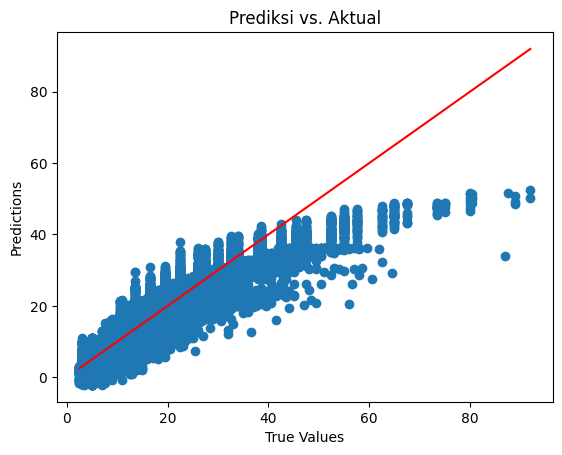

In [181]:
# Visualisasi Aktual vs Prediksi data test
plt.scatter(y_test, test_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Prediksi vs. Aktual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Garis Diagonal 
plt.show()

**Evaluasi model dengan Ridge dan Lasso regression**     

**Regresi Linier Dasar:**    
Metrik pada model regresi ini berfungsi sebagai dasar untuk membandingkan model yang diregulasi. Nilai R² untuk data training dan testing adalah sekitar 0,875, yang menunjukkan bahwa model tersebut menjelaskan sekitar 87,5% varians dalam variabel target, dan ini merupakan kesesuaian yang cukup baik. Perbedaan metrik antara set training dan testing sangat kecil, yang menunjukkan bahwa model tidak mengalami overfitting.       

**Regresi Ridge dengan alpha=0,001:**       
Nilai R² dan RMSE untuk data training dan testing sangat dekat dengan model dasar. Ini menyiratkan bahwa dengan alfa kecil ini, kinerja regresi Ridge hampir sama dengan regresi linier dasar. Sedikit peningkatan pada R² dan RMSE untuk data testing menyiratkan bahwa model ini mungkin dapat digeneralisasikan sedikit lebih baik.       

**Regresi Lasso dengan alpha=0,001:**        
Nilai R² dan RMSE untuk data training dan testing sangat dekat dengan model regresi linier dasar. Ada perbedaan yang sangat tipis dalam metrik antara regresi Ridge dengan alpha=0,001 dan model Lasso ini. Hal ini menunjukkan bahwa kedua metode regularisasi dengan nilai alfa ini mempunyai kinerja yang sama.      

**Regresi Ridge dengan alpha=0,01:**         
Metrik untuk data training dan testing hampir identik dengan model Ridge dengan alpha=0,001. Hal ini menunjukkan bahwa untuk data ini, peningkatan nilai alfa dalam rentang kecil ini tidak mengubah performa model Ridge secara signifikan.    

**Regresi Lasso dengan alpha=0,01:**     
Metrik RMSE terlihat lebih menyimpang dari model dasar pada saat alfa 0,001. Hal ini menunjukkan bahwa penalti pada koefisien menjadi lebih kuat dengan alfa ini, sehingga menyebabkan beberapa koefisien berpotensi menyusut hingga nol. RMSE untuk data training sedikit meningkat, dan R² sedikit menurun, menunjukkan bahwa model ini underfitting atau mungkin kurang cocok dibandingkan dengan model Ridge dengan model alfa yang sama.    

**Interpretasi Keseluruhan:**
<ul>
<li>Kompleksitas Model: Regresi Ridge dan Lasso dengan alpha=0,001 menghasilkan metrik yang hampir sama dengan regresi linier dasar. Sedikit regularisasi tidak mengubah performa model secara signifikan. Saat alfa ditingkatkan (seperti 0,01 untuk Lasso), model menjadi lebih sederhana, dan performanya sedikit menurun dibandingkan dengan model linier dasar.    

<li>Mana yang lebih baik?: Dalam skenario ini, regresi Ridge dengan nilai alfa=0,001  tampaknya paling stabil dalam hal performa pada data testing. Regresi laso dengan peningkatan pada alpha=0,01 menjadi cenderung overfit.     

<li>Kebutuhan Regularisasi: Mengingat bahwa metrik performa untuk model yang regulasi dengan Lasso dan Ridge (terutama dengan alpha=0,001) sangat dekat dengan regresi linier dasar, dengan ini tidak ada kebutuhan yang kuat untuk regularisasi dalam dataset ini. Hal ini dapat berarti model regresi linier awal sudah memiliki performa yang cukup fit dengan fitur yang ada.     

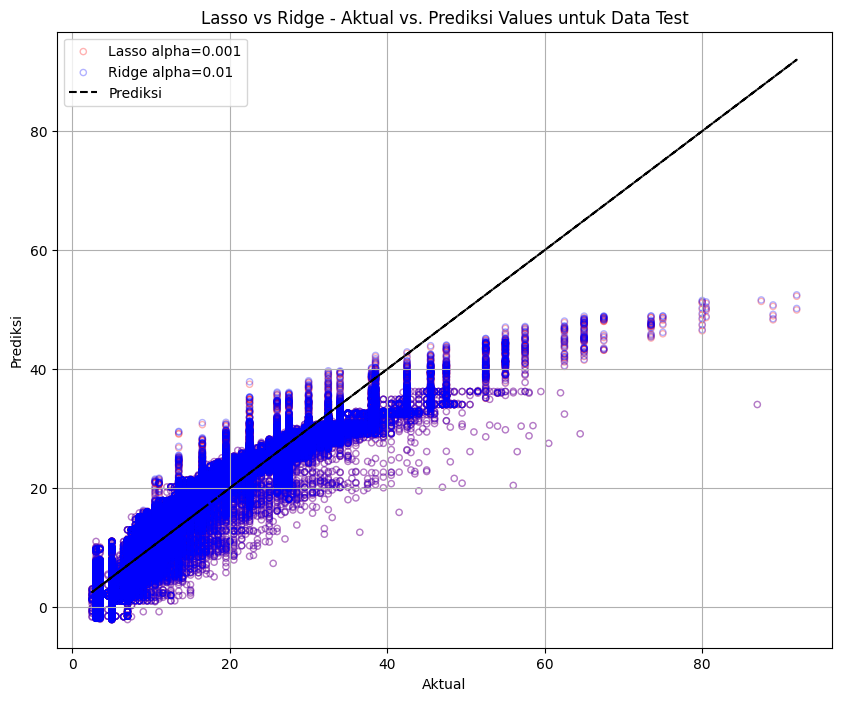

In [182]:
# Membuat Grafik perbandingan antara Ridge dan Lasso
# Untuk Ridge Regression
ridge_01 = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
# Prediksi & Evaluasi untuk Test Data (Ridge)
ridge_pred_01 = ridge.predict(X_test)

# Untuk Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
# Prediksi & Evaluasi untuk Test Data (Lasso)
lasso_pred_001 = lasso.predict(X_test)

plt.figure(figsize=(10,8))


plt.scatter(y_test, lasso_pred_001, alpha=0.3, edgecolors='red', facecolors='none', s=20, label="Lasso alpha=0.001")
plt.scatter(y_test, ridge_pred_01, alpha=0.3, edgecolors='blue', facecolors='none', s=20, label="Ridge alpha=0.01")

plt.plot(y_test, y_test, linestyle="--", color="black", label="Prediksi")

plt.title("Lasso vs Ridge - Aktual vs. Prediksi Values untuk Data Test")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.legend()
plt.grid(True)
plt.show()


# ix. Model Saving

In [183]:
# Menyimpan model dan file yang terkait dengan hasil proses pembuatan model.

with open('model_lr.pkl', 'wb') as file_1:
  joblib.dump(lr, file_1)

with open('min_max_scaler_hour.pkl', 'wb') as file_scaler_hour:
    joblib.dump(min_max_scaler, file_scaler_hour)

with open('label_encoder_name.pkl', 'wb') as file_encoder_label:
    joblib.dump(encoder, file_encoder_label)

with open('onehot_encoder_cab_type.pkl', 'wb') as file_encoder_onehot:
    joblib.dump(encoder1, file_encoder_onehot)


# x. Model Inference

Pada tahap ini, Model yang sudah dilatih akan dicoba pada data baru yang bukan termasuk ke dalam train-set ataupun test-set. 

In [184]:
# Membuat data baru untuk diuji
data_new = pd.DataFrame(
    {
    'hour':[8.0, 16.0, 21.0],
    'day_of_week':["Monday", "Wednesday", "Saturday"],
    'distance':[1.5,2.0,2.5],
    'surge_multiplier': [1.0,1.5,2.0],
    'name':["UberX", "Lux Black XL", "Black"],
    'cab_type':["Uber","Lyft","Uber"]
    }
)

In [185]:
data_new.head()

,hour,day_of_week,distance,surge_multiplier,name,cab_type
0,8.0,Monday,1.5,1.0,UberX,Uber
1,16.0,Wednesday,2.0,1.5,Lux Black XL,Lyft
2,21.0,Saturday,2.5,2.0,Black,Uber


In [186]:
# Membuat data yang akan ditrasnformasi
data_transform = data_new.copy()

In [187]:
# Mentransformasi data
data_transform['is_weekend'] = data_transform['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
data_transform['is_peak_hour'] = data_transform['hour'].apply(lambda x: 1 if x in [13, 14, 15, 17, 18, 19, 20, 21] else 0)
data_transform['hour'] = min_max_scaler.transform(data_transform[['hour']])
# Transformasi log
data_transform['distance_log'] = np.log1p(data_transform['distance'])
data_transform['surge_multiplier_log'] = np.log1p(data_transform['surge_multiplier'])
# Encoding
data_transform['name'] = data_transform['name'].map(custom_label_mapping)
data_transform['name_encoded'] = encoder.transform(data_transform['name'])
encoded_features = encoder1.transform(data_transform[['cab_type']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder1.get_feature_names_out(['cab_type']), index=data_transform.index)
data_transform = pd.concat([data_transform, encoded_features_df], axis=1)
data_transform.drop(columns=['cab_type'], inplace=True)
cols_to_remove = ["name", "distance", "surge_multiplier", "day_of_week"] 
data_transform = data_transform.drop(columns=cols_to_remove)

In [188]:
# Menampilkan data hasil transformasi
data_transform.head()

,hour,is_weekend,is_peak_hour,distance_log,surge_multiplier_log,name_encoded,cab_type_Uber
0,0.347826,0,0,0.916291,0.693147,1,1.0
1,0.695652,0,0,1.098612,0.916291,5,0.0
2,0.913043,1,1,1.252763,1.098612,3,1.0


In [189]:
# Loading model Regresi Liner
with open('model_lr.pkl', 'rb') as file_1:
    model_lr = joblib.load(file_1)

In [190]:
# Menampilkan data yang akan diprediksi
data_new

,hour,day_of_week,distance,surge_multiplier,name,cab_type
0,8.0,Monday,1.5,1.0,UberX,Uber
1,16.0,Wednesday,2.0,1.5,Lux Black XL,Lyft
2,21.0,Saturday,2.5,2.0,Black,Uber


In [191]:
# Memprediksi harga berdasarkan model Regresi Liner
data_new['price'] = model_lr.predict(data_transform)

In [192]:
# Menampilkan Data baru dengan nilai estimasi harga
data_new

,hour,day_of_week,distance,surge_multiplier,name,cab_type,price
0,8.0,Monday,1.5,1.0,UberX,Uber,10.989805
1,16.0,Wednesday,2.0,1.5,Lux Black XL,Lyft,38.351197
2,21.0,Saturday,2.5,2.0,Black,Uber,40.636370


# xi. Pengambilan Kesimpulan

Berdasarkan hasil analisis data, Model regresi liniar dengan memanfaatkan kerangka Machine Learning Scikit-Learn dapat memberikan pemahaman awal tentang bagaimana berbagai faktor yang mempengaruhi harga platform ride-hailing. Data yang diperoleh sekitar 500 ribu data observasi yang digunakan untuk data pengujian (training data) pada model analisis regresi ini, berasal dari data sampel yang diambil dari 2 perusahaan penyedia layanan transportasi ride-hailing di Amerika Serikat, yaitu Uber dan Lyft.     

Dalam mengukur variabel-variabel prediktor yang digunakan untuk model analisis regresi, dilakukan analisis data eksplorasi pada tahap awal untuk mengidentifikasi beberapa faktor yang memiliki hubungan yang cukup kuat terhadap harga. Jarak perjalanan dan saat-saat tertentu ketika permintaan tinggi terjadi lonjakan tarif merupakan faktor-faktor yang utama sebagai penggerak harga. Waktu dan hari-hari tertentu dalam seminggu juga berperan dalam variasi harga. Jenis Layanan ride-haling, dalam kasus ini baik Uber maupun Lyft menawarkan beragam layanan, mulai dari perjalanan murah, privat, kendaraan extra besar hingga layanan kemewahan juga teridentifikasi mempengaruhi harga. Terkait dengan variabel-variabel yang berhubungan dengan kondisi cuaca dan suhu udara, analisis data ini tidak menemukan adanya hubungan yang konsisten terhadap harga. Hal ini dibuktikan dengan hasil uji korelasi yang menunjukkan bahwa tidak ada hubungan yang kuat antara kondisi cuaca dan faktor meteorologi lainnya terhadap biaya perjalanan. Sehingga variabel-variabel ini dikesampingkan dan tidak dimasukkan dalam model prediksi ini.

Analisis ini membangun model Regresi Linier dengan memanfaatkan Machine Learning Scikit-Learn untuk memprediksi harga perjalanan berdasarkan faktor-faktor berpengaruh yang diidentifikasi. Berdasarkan evaluasi terhadap performa metrik model regresi yang diukur dengan tingkat MAE, MSE, RMSE, dan R², hasil pengujian pada data training dan testing menunjukkan model regresi yang digunakan memiliki akurasi yang baik dengan nilai rata-rata kesalahan yang minim dan nilai prediktif R² yang tinggi. Selisih antara metrik pada pengujian dan pelatihan data sangat minim, secara konsisten metrik pada data set testing menunjukkan error yang sedikit lebih tinggi daripada data set training, sehingga tidak terindikasi adanya overfitting pada model regresi linear ini. Untuk meningkatkan performa model regresi ini, dilakukan juga evaluasi dengan penggunaan hyperparameter alfa model terregulasi Ridge dan Lasso (dengan alfa = 0,001 dan 0,01) untuk membandingkannya dengan metrik model regresi linear awal. Hasil pengujian model dengan Ridge dan Lasso sangat mirip dengan model regresi linier dasar, yang menunjukkan bahwa pada awalnya tidak banyak overfitting pada model linier asli. Fakta bahwa metrik antara kumpulan data training dan testing sangat mirip menyiratkan bahwa model ini dapat melakukan generalisasi dengan baik terhadap data baru yang belum terlihat. Hal ini juga dapat ditunjukkan dengan Nilai R² yang cukup tinggi, baik untuk data pelatihan maupun pengujian, menunjukkan bahwa fitur yang dipilih menjelaskan sekitar 87,5% atau sebagian besar varians dalam variabel target. Kesimpulannya, berdasarkan metrik yang diukur, model regresi linier awal telah berhasil memprediksi harga perjalanan ride-hailing dengan sangat baik. Model ini cukup akurat, menggeneralisasi dengan baik data yang tidak terlihat, dan menangkap sebagian besar variasi harga perjalanan.     

Berikut ini informasi terkait nama variabel prediktor dan koefisien regresi linear berdasarkan model data training:  

| Predictor Variable    | Regression Coefficient     |
|-----------------------|----------------------------|
| hour                 | -0.02366191658590472       |
| is_weekend            | -0.0018867406073269088     |
| is_peak_hour          | 0.01647366800778585        |
| distance_log          | 8.610459494731176          |
| surge_multiplier_log  | 41.744313669812534         |
| name_encoded          | 4.91115492153633           |
| cab_type_Uber         | 3.159843845117927          |



# Conceptual Problems

**1. Asumsi yang dipakai oleh Linear Regression:**

1. Asumsi Normalitas: Regresi linier mensyaratkan hubungan antara variabel independen (prediktor) dan dependen (target) harus linier. 
2. Rata-rata nilai residual harus sama dengan atau mendekati nol. Residual adalah selisih antara nilai sebenarnya dan nilai prediksi. 
3. Heteroskedastisitas harus terpenuhi atau nilai residu harus mempunyai varian yang berbeda di seluruh garis regresi atau dengan kata lain tidak boleh terdapat pola yang sama antara nilai prediksi dan nilai residu.
4. Tidak ada autokorelasi atau nilai residu tidak terautokorelasi, artinya nilai saat ini tidak boleh bergantung pada nilai sebelumnya (historis) dan tidak boleh terdapat pola pasti yang tidak dapat dijelaskan pada variabel Y.
5. Tidak boleh terdapat multikolinearitas, yaitu mengacu pada sejauh mana variabel independen berkorelasi. Tidak boleh terdapat korelasi antar variabel independen.


**2. Arti dari slope dan intercept yang didapat dari Model Regresi Linear**

In [199]:
# Mengidentifikasi nilai slope dan intercept pada model regresi yang diuji
# Menampilkan intercept
print(f'Intercept: {lr.intercept_}')

# Menampilkan nama variabel perdiktor dan slop (koefisien regresi)
for feature, coef in zip(X_train, lr.coef_):
    print(f'Slope dari {feature}: {coef}')

Intercept: -33.897601577534246
Slope dari hour: -0.02366191658590472
Slope dari is_weekend: -0.0018867406073269088
Slope dari is_peak_hour: 0.01647366800778585
Slope dari distance_log: 8.610459494731176
Slope dari surge_multiplier_log: 41.744313669812534
Slope dari name_encoded: 4.91115492153633
Slope dari cab_type_Uber: 3.159843845117927


<ul>
<li>Intercept (-33.897601577534246):
Intersep mewakili nilai yang diharapkan dari variabel target ketika variabel prediktor bernilai 0. Terkait dengan model regresi ini, intercepet berarti harga yang diprediksi dari sebuah perjalanan ketika variabel prediktor ini adalah 0. Namun, dalam praktiknya nilai intersep mungkin tidak selalu memiliki interpretasi nyata yang jelas secara praktis.
<li>"hour": Koefisien bernilai -0,02366 menunjukkan bahwa semakin malam suatu perjalanan, maka ada kecenderungan harga perjalanannya semakin murah, namun terkait dampaknya cukup terbatas atau perkiraan harga perjalanan hanya turun sekitar $0,02366 seiring jam-jam menjelang malam hari.  
<li>"is_weekend": Memiliki koefisien -0,00189 menunjukkan bahwa perjalanan selama akhir pekan diperkirakan akan sedikit lebih murah sekitar $0,00189 dibandingkan pada hari kerja, dengan asumsi semua faktor lainnya tetap konstan. Akan tetapi berdasarkan nilai koefisiennya, angkanya sangat kecil sehingga tidak berdampak signifikan terhadap harga.
<li>"is_peak_hour": Koefisien 0,01647 menunjukkan bahwa selama jam sibuk atau pada jam "rush hour", sekitar jam 1 siang dan jam 7 malam perkiraan harga perjalanan meningkat sekitar $0,01647 dibandingkan dengan jam di luar jam sibuk, dengan seluruh variabel lainnya dianggap konstan. Hal ini menunjukkan bahwa perjalanan pada jam sibuk sedikit lebih mahal.
<li>"distance_log": Dengan koefisien sebesar 8,6105 menunjukkan bahwa jarak dalam skala log yang ditransformasikan mempunyai pengaruh positif yang relatif signifikan terhadap prediksi harga perjalanan. Ketika jarak yang dicatat bertambah satu unit, maka harga diprediksi akan meningkat sekitar $8,61. Hasil ini sejalan dengan dasar logika bahwa perjalanan yang lebih jauh akan memakan biaya lebih banyak.
<li>"surge_multiplier_log": Dengan koefisien kuat sebesar 41,7443, variabel ini memiliki pengaruh yang paling besar terhadap prediksi harga perjalanan. Ketika pengganda lonjakan yang telah ditransformasikan dengan log ini meningkat sebesar satu unit, maka harga perjalanan diperkirakan meningkat sebesar $41,74. Hal ini mungkin terkait dengan tingkat kemacetan atau permintaan yang sangat tinggi pada keadaan-keadaan tertentu yang berdasarkan data ini tidak dijelaskan secara detail terkait variabel ini.
<li>"name_encoded": Koefisien sebesar 4,9112 menunjukkan bahwa adanya keterkaitan antara nama produk dan tingkat pelayanan dari ride-hailing terhadap peningkatan harga. Seperti diketahui bahwa layanan yang ditawarkan masing-masing penyedia transportasi ride-hailing berbeda berdasarkan tingkatannya, misalnya terdapat layanan trasnportasi privat untuk umum, layanan muatan banyak orang, layanan kelas mewah dan eksklusif dan sebagainya. Dengan ini, wajar apabila semakin tinggi layanan yang ditawarkan, maka semakin tinggi juga harga perjalanannya.      
"cab_type_Uber": Koefisien 3,1598 menunjukkan bahwa pada data ini pilihan untuk perjalanan dengan Uber relatif memiliki harga yang lebih tinggi daripada Lyft, diperkirakan akan lebih mahal sekitar $3,16 yang dapat dijelaskan dari data ini.